# Sinking terms vs grazing directly

#### Units: $\frac{mmol}{m^3}  \frac{cm}{s}$

### Import libraries 

In [1]:
%matplotlib inline
import warnings
warnings.simplefilter("ignore") # Silence warnings
import hvplot.xarray
import xarray as xr
import cartopy.crs as ccrs

import geoviews as gv
import holoviews as hv
import numpy as np
import math
from matplotlib.pyplot import figure

# MatPlotlib
import matplotlib.pyplot as plt
from matplotlib import pylab

# Scientific libraries
from numpy import arange,array,ones
from scipy import stats

import seaborn as sns
import scipy.io as sio

import numpy.ma as ma
from netCDF4 import Dataset as NetCDFFile
import glob
import pylab 
from copy import deepcopy
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm
import matplotlib as mpl

### sort files numerically 

In [2]:
import re
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

### Adjust pop grid

In [3]:
def adjust_pop_grid(tlon,tlat,field):
    nj = tlon.shape[0]
    ni = tlon.shape[1]
    xL = int(ni/2 - 1)
    xR = int(xL + ni)

    tlon = np.where(np.greater_equal(tlon,np.min(tlon[:,0])),tlon-360.,tlon)
    lon  = np.concatenate((tlon,tlon+360.),1)
    lon = lon[:,xL:xR]

    if ni == 320:
        lon[367:-3,0] = lon[367:-3,0]+360.
    lon = lon - 360.
    lon = np.hstack((lon,lon[:,0:1]+360.))
    if ni == 320:
        lon[367:,-1] = lon[367:,-1] - 360.

    #-- trick cartopy into doing the right thing:
    #   it gets confused when the cyclic coords are identical
    lon[:,0] = lon[:,0]-1e-8

    #-- periodicity
    lat  = np.concatenate((tlat,tlat),1)
    lat = lat[:,xL:xR]
    lat = np.hstack((lat,lat[:,0:1]))

    field = np.ma.concatenate((field,field),1)
    field = field[:,xL:xR]
    field = np.ma.hstack((field,field[:,0:1]))
    return lon,lat,field

### Select the final run that you would like to use. We are currently using GNG595 (20yrclim) 2nd cycle. 

In [4]:
print('What is the new file? (new_file)')
new_file = input('')
print('What year? (year)')
year = input('')

What is the new file? (new_file)


 GNG595


What year? (year)


 20yrclim


### Import last 20 year climatology of the second cycle representing Jan 1990 - Dec 2009. (pop grid)

In [5]:
## Gaby's Path 
gabyn_path = '/glade/scratch/gabyn/archive/g.e21.G1850ECOIAF.t62_g17.marbl0_33.'

## import from climatology path (different from above)
newNCDFfiles = sorted(glob.glob('/glade/scratch/gabyn/GNG595_2ndcycle_20year_clim/*', recursive=True),
                      key=numericalSort)

## create a dataframe with the data. 
ds = xr.open_mfdataset(newNCDFfiles,combine='by_coords')

## Regular grid variables (180 by 360)

### The parameter we are uploading is 'graze_{plankton}_zoo_zint_100m'
##### Attributes:
    long_name:     Plankton Grazing to ZOO Vertical Integral, 0-100m
    units:         mmol/m^3 cm/s
    grid_loc:      2110
    cell_methods:  time: mean

In [36]:
# remap path 
remap_2nd_20clim_path_graze = '/glade/scratch/gabyn/GNG595_2ndcycle_20year_clim_remap/regrid_GNG595_graze_'
zint = 'zoo_zint_100m'
pp_zoo_inds = sorted(glob.glob(''+remap_2nd_20clim_path_graze+'pp_'+zint+'.*.nc', recursive=True))
pp_graze_ds = xr.open_mfdataset(pp_zoo_inds,combine='by_coords')

mp1_zoo_inds = sorted(glob.glob(''+remap_2nd_20clim_path_graze+'mp1_'+zint+'.*.nc', recursive=True))
mp1_graze_ds = xr.open_mfdataset(mp1_zoo_inds,combine='by_coords')

mp2_zoo_inds = sorted(glob.glob(''+remap_2nd_20clim_path_graze+'mp2_'+zint+'.*.nc', recursive=True))
mp2_graze_ds = xr.open_mfdataset(mp2_zoo_inds,combine='by_coords')

mp3_zoo_inds = sorted(glob.glob(''+remap_2nd_20clim_path_graze+'mp3_'+zint+'.*.nc', recursive=True))
mp3_graze_ds = xr.open_mfdataset(mp3_zoo_inds,combine='by_coords')

mp4_zoo_inds = sorted(glob.glob(''+remap_2nd_20clim_path_graze+'mp4_'+zint+'.*.nc', recursive=True))
mp4_graze_ds = xr.open_mfdataset(mp4_zoo_inds,combine='by_coords')

diat1_zoo_inds = sorted(glob.glob(''+remap_2nd_20clim_path_graze+'diat1_'+zint+'.*.nc', recursive=True))
diat1_graze_ds = xr.open_mfdataset(diat1_zoo_inds,combine='by_coords')

diat2_zoo_inds = sorted(glob.glob(''+remap_2nd_20clim_path_graze+'diat2_'+zint+'.*.nc', recursive=True))
diat2_graze_ds = xr.open_mfdataset(diat2_zoo_inds,combine='by_coords')

diat3_zoo_inds = sorted(glob.glob(''+remap_2nd_20clim_path_graze+'diat3_'+zint+'.*.nc', recursive=True))
diat3_graze_ds = xr.open_mfdataset(diat3_zoo_inds,combine='by_coords')

diaz_zoo_inds = sorted(glob.glob(''+remap_2nd_20clim_path_graze+'diaz_'+zint+'.*.nc', recursive=True))
diaz_graze_ds = xr.open_mfdataset(diaz_zoo_inds,combine='by_coords')

In [37]:
# remap path 
remap_2nd_20clim_path_graze = '/glade/scratch/gabyn/GNG595_2ndcycle_20year_clim_remap/regrid_GNG595_'
zint = 'agg_zint_100m'
pp_agg_inds = sorted(glob.glob(''+remap_2nd_20clim_path_graze+'pp_'+zint+'.*.nc', recursive=True))
pp_agg_ds = xr.open_mfdataset(pp_agg_inds,combine='by_coords')

mp1_agg_inds = sorted(glob.glob(''+remap_2nd_20clim_path_graze+'mp1_'+zint+'.*.nc', recursive=True))
mp1_agg_ds = xr.open_mfdataset(mp1_agg_inds,combine='by_coords')

mp2_agg_inds = sorted(glob.glob(''+remap_2nd_20clim_path_graze+'mp2_'+zint+'.*.nc', recursive=True))
mp2_agg_ds = xr.open_mfdataset(mp2_agg_inds,combine='by_coords')

mp3_agg_inds = sorted(glob.glob(''+remap_2nd_20clim_path_graze+'mp3_'+zint+'.*.nc', recursive=True))
mp3_agg_ds = xr.open_mfdataset(mp3_agg_inds,combine='by_coords')

mp4_agg_inds = sorted(glob.glob(''+remap_2nd_20clim_path_graze+'mp4_'+zint+'.*.nc', recursive=True))
mp4_agg_ds = xr.open_mfdataset(mp4_agg_inds,combine='by_coords')

diat1_agg_inds = sorted(glob.glob(''+remap_2nd_20clim_path_graze+'diat1_'+zint+'.*.nc', recursive=True))
diat1_agg_ds = xr.open_mfdataset(diat1_agg_inds,combine='by_coords')

diat2_agg_inds = sorted(glob.glob(''+remap_2nd_20clim_path_graze+'diat2_'+zint+'.*.nc', recursive=True))
diat2_agg_ds = xr.open_mfdataset(diat2_agg_inds,combine='by_coords')

diat3_agg_inds = sorted(glob.glob(''+remap_2nd_20clim_path_graze+'diat3_'+zint+'.*.nc', recursive=True))
diat3_agg_ds = xr.open_mfdataset(diat3_agg_inds,combine='by_coords')

diaz_agg_inds = sorted(glob.glob(''+remap_2nd_20clim_path_graze+'diaz_'+zint+'.*.nc', recursive=True))
diaz_agg_ds = xr.open_mfdataset(diaz_agg_inds,combine='by_coords')

### The parameter we are uploading is '{plankton}_loss_zint_100m'
##### Attributes:
    long_name:     plankton Loss Vertical Integral, 0-100m
    units:         mmol/m^3 cm/s
    grid_loc:      2110
    cell_methods:  time: mean

In [38]:
# remap path 
remap_2nd_20clim_path = '/glade/scratch/gabyn/GNG595_2ndcycle_20year_clim_remap/regrid_GNG595_'
loss  = 'loss_zint_100m'
pp_loss_inds = sorted(glob.glob(''+remap_2nd_20clim_path+'pp_'+loss+'.*.nc', recursive=True))
pp_loss_ds = xr.open_mfdataset(pp_loss_inds,combine='by_coords')

mp1_loss_inds = sorted(glob.glob(''+remap_2nd_20clim_path+'mp1_'+loss+'.*.nc', recursive=True))
mp1_loss_ds = xr.open_mfdataset(mp1_loss_inds,combine='by_coords')

mp2_loss_inds = sorted(glob.glob(''+remap_2nd_20clim_path+'mp2_'+loss+'.*.nc', recursive=True))
mp2_loss_ds = xr.open_mfdataset(mp2_loss_inds,combine='by_coords')

mp3_loss_inds = sorted(glob.glob(''+remap_2nd_20clim_path+'mp3_'+loss+'.*.nc', recursive=True))
mp3_loss_ds = xr.open_mfdataset(mp3_loss_inds,combine='by_coords')

mp4_loss_inds = sorted(glob.glob(''+remap_2nd_20clim_path+'mp4_'+loss+'.*.nc', recursive=True))
mp4_loss_ds = xr.open_mfdataset(mp4_loss_inds,combine='by_coords')

diat1_loss_inds = sorted(glob.glob(''+remap_2nd_20clim_path+'diat1_'+loss+'.*.nc', recursive=True))
diat1_loss_ds = xr.open_mfdataset(diat1_loss_inds,combine='by_coords')

diat2_loss_inds = sorted(glob.glob(''+remap_2nd_20clim_path+'diat2_'+loss+'.*.nc', recursive=True))
diat2_loss_ds = xr.open_mfdataset(diat2_loss_inds,combine='by_coords')

diat3_loss_inds = sorted(glob.glob(''+remap_2nd_20clim_path+'diat3_'+loss+'.*.nc', recursive=True))
diat3_loss_ds = xr.open_mfdataset(diat3_loss_inds,combine='by_coords')

diaz_loss_inds = sorted(glob.glob(''+remap_2nd_20clim_path+'diaz_'+loss+'.*.nc', recursive=True))
diaz_loss_ds = xr.open_mfdataset(diaz_loss_inds,combine='by_coords')

In [39]:
# remap path 
remap_2nd_20clim_path = '/glade/scratch/gabyn/GNG595_2ndcycle_20year_clim_remap/regrid_GNG595_'
loss  = 'loss_poc_zint_100m'
pp_loss_poc_inds = sorted(glob.glob(''+remap_2nd_20clim_path+'pp_'+loss+'.*.nc', recursive=True))
pp_loss_poc_ds = xr.open_mfdataset(pp_loss_poc_inds,combine='by_coords')

mp1_loss_poc_inds = sorted(glob.glob(''+remap_2nd_20clim_path+'mp1_'+loss+'.*.nc', recursive=True))
mp1_loss_poc_ds = xr.open_mfdataset(mp1_loss_poc_inds,combine='by_coords')

mp2_loss_poc_inds = sorted(glob.glob(''+remap_2nd_20clim_path+'mp2_'+loss+'.*.nc', recursive=True))
mp2_loss_poc_ds = xr.open_mfdataset(mp2_loss_poc_inds,combine='by_coords')

mp3_loss_poc_inds = sorted(glob.glob(''+remap_2nd_20clim_path+'mp3_'+loss+'.*.nc', recursive=True))
mp3_loss_poc_ds = xr.open_mfdataset(mp3_loss_poc_inds,combine='by_coords')

mp4_loss_poc_inds = sorted(glob.glob(''+remap_2nd_20clim_path+'mp4_'+loss+'.*.nc', recursive=True))
mp4_loss_poc_ds = xr.open_mfdataset(mp4_loss_poc_inds,combine='by_coords')

diat1_loss_poc_inds = sorted(glob.glob(''+remap_2nd_20clim_path+'diat1_'+loss+'.*.nc', recursive=True))
diat1_loss_poc_ds = xr.open_mfdataset(diat1_loss_poc_inds,combine='by_coords')

diat2_loss_poc_inds = sorted(glob.glob(''+remap_2nd_20clim_path+'diat2_'+loss+'.*.nc', recursive=True))
diat2_loss_poc_ds = xr.open_mfdataset(diat2_loss_poc_inds,combine='by_coords')

diat3_loss_poc_inds = sorted(glob.glob(''+remap_2nd_20clim_path+'diat3_'+loss+'.*.nc', recursive=True))
diat3_loss_poc_ds = xr.open_mfdataset(diat3_loss_poc_inds,combine='by_coords')

diaz_loss_poc_inds = sorted(glob.glob(''+remap_2nd_20clim_path+'diaz_'+loss+'.*.nc', recursive=True))
diaz_loss_poc_ds = xr.open_mfdataset(diaz_loss_poc_inds,combine='by_coords')


In [40]:
# remap path 
remap_2nd_20clim_path = '/glade/scratch/gabyn/GNG595_2ndcycle_20year_clim_remap/regrid_GNG595_'
loss  = 'loss_doc_zint_100m'
pp_loss_doc_inds = sorted(glob.glob(''+remap_2nd_20clim_path+'pp_'+loss+'.*.nc', recursive=True))
pp_loss_doc_ds = xr.open_mfdataset(pp_loss_doc_inds,combine='by_coords')

mp1_loss_doc_inds = sorted(glob.glob(''+remap_2nd_20clim_path+'mp1_'+loss+'.*.nc', recursive=True))
mp1_loss_doc_ds = xr.open_mfdataset(mp1_loss_doc_inds,combine='by_coords')

mp2_loss_doc_inds = sorted(glob.glob(''+remap_2nd_20clim_path+'mp2_'+loss+'.*.nc', recursive=True))
mp2_loss_doc_ds = xr.open_mfdataset(mp2_loss_doc_inds,combine='by_coords')

mp3_loss_doc_inds = sorted(glob.glob(''+remap_2nd_20clim_path+'mp3_'+loss+'.*.nc', recursive=True))
mp3_loss_doc_ds = xr.open_mfdataset(mp3_loss_doc_inds,combine='by_coords')

mp4_loss_doc_inds = sorted(glob.glob(''+remap_2nd_20clim_path+'mp4_'+loss+'.*.nc', recursive=True))
mp4_loss_doc_ds = xr.open_mfdataset(mp4_loss_doc_inds,combine='by_coords')

diat1_loss_doc_inds = sorted(glob.glob(''+remap_2nd_20clim_path+'diat1_'+loss+'.*.nc', recursive=True))
diat1_loss_doc_ds = xr.open_mfdataset(diat1_loss_doc_inds,combine='by_coords')

diat2_loss_doc_inds = sorted(glob.glob(''+remap_2nd_20clim_path+'diat2_'+loss+'.*.nc', recursive=True))
diat2_loss_doc_ds = xr.open_mfdataset(diat2_loss_doc_inds,combine='by_coords')

diat3_loss_doc_inds = sorted(glob.glob(''+remap_2nd_20clim_path+'diat3_'+loss+'.*.nc', recursive=True))
diat3_loss_doc_ds = xr.open_mfdataset(diat3_loss_doc_inds,combine='by_coords')

diaz_loss_doc_inds = sorted(glob.glob(''+remap_2nd_20clim_path+'diaz_'+loss+'.*.nc', recursive=True))
diaz_loss_doc_ds = xr.open_mfdataset(diaz_loss_doc_inds,combine='by_coords')

In [41]:
## Stack all of these values together, for grazing and for loss. 
graze_regrid = np.stack([pp_graze_ds.graze_pp_zoo_zint_100m,
                                               diat1_graze_ds.graze_diat1_zoo_zint_100m,
                                               diat2_graze_ds.graze_diat2_zoo_zint_100m,
                                               diat3_graze_ds.graze_diat3_zoo_zint_100m,
                                               mp1_graze_ds.graze_mp1_zoo_zint_100m,
                                               mp2_graze_ds.graze_mp2_zoo_zint_100m,
                                               mp3_graze_ds.graze_mp3_zoo_zint_100m,
                                               mp4_graze_ds.graze_mp4_zoo_zint_100m,
                                               diaz_graze_ds.graze_diaz_zoo_zint_100m])

loss_regrid     = np.stack([pp_loss_ds.pp_loss_zint_100m,
                                               diat1_loss_ds.diat1_loss_zint_100m,
                                               diat2_loss_ds.diat2_loss_zint_100m,
                                               diat3_loss_ds.diat3_loss_zint_100m,
                                               mp1_loss_ds.mp1_loss_zint_100m,
                                               mp2_loss_ds.mp2_loss_zint_100m,
                                               mp3_loss_ds.mp3_loss_zint_100m,
                                               mp4_loss_ds.mp4_loss_zint_100m,
                                               diaz_loss_ds.diaz_loss_zint_100m])

loss_poc_regrid     = np.stack([pp_loss_poc_ds.pp_loss_poc_zint_100m,
                                               diat1_loss_poc_ds.diat1_loss_poc_zint_100m,
                                               diat2_loss_poc_ds.diat2_loss_poc_zint_100m,
                                               diat3_loss_poc_ds.diat3_loss_poc_zint_100m,
                                               mp1_loss_poc_ds.mp1_loss_poc_zint_100m,
                                               mp2_loss_poc_ds.mp2_loss_poc_zint_100m,
                                               mp3_loss_poc_ds.mp3_loss_poc_zint_100m,
                                               mp4_loss_poc_ds.mp4_loss_poc_zint_100m,
                                               diaz_loss_poc_ds.diaz_loss_poc_zint_100m])

loss_doc_regrid     = np.stack([pp_loss_doc_ds.pp_loss_doc_zint_100m,
                                               diat1_loss_doc_ds.diat1_loss_doc_zint_100m,
                                               diat2_loss_doc_ds.diat2_loss_doc_zint_100m,
                                               diat3_loss_doc_ds.diat3_loss_doc_zint_100m,
                                               mp1_loss_doc_ds.mp1_loss_doc_zint_100m,
                                               mp2_loss_doc_ds.mp2_loss_doc_zint_100m,
                                               mp3_loss_doc_ds.mp3_loss_doc_zint_100m,
                                               mp4_loss_doc_ds.mp4_loss_doc_zint_100m,
                                               diaz_loss_doc_ds.diaz_loss_doc_zint_100m])

agg_regrid     = np.stack([pp_agg_ds.pp_agg_zint_100m,
                                               diat1_agg_ds.diat1_agg_zint_100m,
                                               diat2_agg_ds.diat2_agg_zint_100m,
                                               diat3_agg_ds.diat3_agg_zint_100m,
                                               mp1_agg_ds.mp1_agg_zint_100m,
                                               mp2_agg_ds.mp2_agg_zint_100m,
                                               mp3_agg_ds.mp3_agg_zint_100m,
                                               mp4_agg_ds.mp4_agg_zint_100m,
                                               diaz_agg_ds.diaz_agg_zint_100m])







In [46]:
plankton_graze_prop = np.zeros([9,12,180,360])
plankton_loss_dic_prop = np.zeros([9,12,180,360])
plankton_loss_doc_prop = np.zeros([9,12,180,360])
plankton_loss_poc_prop = np.zeros([9,12,180,360])

plankton_loss_dic = loss_regrid - loss_poc_regrid - loss_doc_regrid
total = graze_regrid+loss_regrid+agg_regrid
for i in range(0,9):
    plankton_graze_prop[i,:,:,:] = graze_regrid[i,:,:,:]/(total[i,:,:,:])*100
    plankton_loss_doc_prop[i,:,:,:]  = loss_doc_regrid[i,:,:,:]/(total[i,:,:,:])*100
    plankton_loss_poc_prop[i,:,:,:]  = (loss_poc_regrid[i,:,:,:]+ agg_regrid[i,:,:,:])/(total[i,:,:,:])*100
    plankton_loss_dic_prop[i,:,:,:]  = plankton_loss_dic[i,:,:,:]/(total[i,:,:,:])*100

In [47]:
x = months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
loss_graze = pd.DataFrame(x)
loss_graze['graze']=np.nan # add column for the prey idex 
loss_graze['loss_doc']=np.nan # add column for the predator idex 
loss_graze['loss_poc']=np.nan
loss_graze['loss_dic']=np.nan

In [48]:
loss_graze_pp = np.array(loss_graze) 
# populate 
for i in range(len(loss_graze.index)):
    loss_graze_pp[i,1] = np.nanmean(plankton_graze_prop[0,i,170:180,:], axis=(0,1))
    loss_graze_pp[i,2] = np.nanmean(plankton_loss_dic_prop[0,i,170:180,:], axis=(0,1))
    loss_graze_pp[i,3] = np.nanmean(plankton_loss_doc_prop[0,i,170:180,:], axis=(0,1))
    loss_graze_pp[i,4] = np.nanmean(plankton_loss_poc_prop[0,i,170:180,:], axis=(0,1))
    #loss_graze_pp[i,5] = np.nanmean(plankton_loss_agg_prop[0,i,170:180,:], axis=(0,1))
    
    
loss_graze_d1 = np.array(loss_graze) 
# populate 
for i in range(len(loss_graze.index)):
    loss_graze_d1[i,1] = np.nanmean(plankton_graze_prop[1,i,170:180,:], axis=(0,1))
    loss_graze_d1[i,2] = np.nanmean(plankton_loss_dic_prop[1,i,170:180,:], axis=(0,1))
    loss_graze_d1[i,3] = np.nanmean(plankton_loss_doc_prop[1,i,170:180,:], axis=(0,1))
    loss_graze_d1[i,4] = np.nanmean(plankton_loss_poc_prop[1,i,170:180,:], axis=(0,1))
    #loss_graze_d1[i,5] = np.nanmean(plankton_loss_agg_prop[1,i,170:180,:], axis=(0,1))
    
    
loss_graze_d2 = np.array(loss_graze) 
# populate 
for i in range(len(loss_graze.index)):
    loss_graze_d2[i,1] = np.nanmean(plankton_graze_prop[2,i,170:180,:], axis=(0,1))
    loss_graze_d2[i,2] = np.nanmean(plankton_loss_dic_prop[2,i,170:180,:], axis=(0,1))
    loss_graze_d2[i,3] = np.nanmean(plankton_loss_doc_prop[2,i,170:180,:], axis=(0,1))
    loss_graze_d2[i,4] = np.nanmean(plankton_loss_poc_prop[2,i,170:180,:], axis=(0,1))
    #loss_graze_d2[i,5] = np.nanmean(plankton_loss_agg_prop[2,i,170:180,:], axis=(0,1))
    
loss_graze_d3 = np.array(loss_graze) 
# populate 
for i in range(len(loss_graze.index)):
    loss_graze_d3[i,1] = np.nanmean(plankton_graze_prop[3,i,170:180,:], axis=(0,1))
    loss_graze_d3[i,2] = np.nanmean(plankton_loss_dic_prop[3,i,170:180,:], axis=(0,1))
    loss_graze_d3[i,3] = np.nanmean(plankton_loss_doc_prop[3,i,170:180,:], axis=(0,1))
    loss_graze_d3[i,4] = np.nanmean(plankton_loss_poc_prop[3,i,170:180,:], axis=(0,1))
    #loss_graze_d3[i,5] = np.nanmean(plankton_loss_agg_prop[3,i,170:180,:], axis=(0,1))
    
    
loss_graze_mp1 = np.array(loss_graze) 
# populate 
for i in range(len(loss_graze.index)):
    loss_graze_mp1[i,1] = np.nanmean(plankton_graze_prop[4,i,170:180,:], axis=(0,1))
    loss_graze_mp1[i,2] = np.nanmean(plankton_loss_dic_prop[4,i,170:180,:], axis=(0,1))
    loss_graze_mp1[i,3] = np.nanmean(plankton_loss_doc_prop[4,i,170:180,:], axis=(0,1))
    loss_graze_mp1[i,4] = np.nanmean(plankton_loss_poc_prop[4,i,170:180,:], axis=(0,1))
    #loss_graze_mp1[i,5] = np.nanmean(plankton_loss_agg_prop[4,i,170:180,:], axis=(0,1))
    
    
loss_graze_mp2 = np.array(loss_graze) 
# populate 
for i in range(len(loss_graze.index)):
    loss_graze_mp2[i,1] = np.nanmean(plankton_graze_prop[5,i,170:180,:], axis=(0,1))
    loss_graze_mp2[i,2] = np.nanmean(plankton_loss_dic_prop[5,i,170:180,:], axis=(0,1))
    loss_graze_mp2[i,3] = np.nanmean(plankton_loss_doc_prop[5,i,170:180,:], axis=(0,1))
    loss_graze_mp2[i,4] = np.nanmean(plankton_loss_poc_prop[5,i,170:180,:], axis=(0,1))  
    #loss_graze_mp2[i,5] = np.nanmean(plankton_loss_agg_prop[5,i,170:180,:], axis=(0,1))

loss_graze_mp3 = np.array(loss_graze) 
# populate 
for i in range(len(loss_graze.index)):
    loss_graze_mp3[i,1] = np.nanmean(plankton_graze_prop[6,i,170:180,:], axis=(0,1))
    loss_graze_mp3[i,2] = np.nanmean(plankton_loss_dic_prop[6,i,170:180,:], axis=(0,1))
    loss_graze_mp3[i,3] = np.nanmean(plankton_loss_doc_prop[6,i,170:180,:], axis=(0,1))
    loss_graze_mp3[i,4] = np.nanmean(plankton_loss_poc_prop[6,i,170:180,:], axis=(0,1))
    #loss_graze_mp3[i,5] = np.nanmean(plankton_loss_agg_prop[6,i,170:180,:], axis=(0,1))
    
    
loss_graze_mp4 = np.array(loss_graze) 
# populate 
for i in range(len(loss_graze.index)):
    loss_graze_mp4[i,1] = np.nanmean(plankton_graze_prop[7,i,170:180,:], axis=(0,1))
    loss_graze_mp4[i,2] = np.nanmean(plankton_loss_dic_prop[7,i,170:180,:], axis=(0,1))
    loss_graze_mp4[i,3] = np.nanmean(plankton_loss_doc_prop[7,i,170:180,:], axis=(0,1))
    loss_graze_mp4[i,4] = np.nanmean(plankton_loss_poc_prop[7,i,170:180,:], axis=(0,1))
    #loss_graze_mp4[i,5] = np.nanmean(plankton_loss_agg_prop[7,i,170:180,:], axis=(0,1))
    
    
loss_graze_d = np.array(loss_graze) 
# populate 
for i in range(len(loss_graze.index)):
    loss_graze_d[i,1] = np.nanmean(plankton_graze_prop[8,i,170:180,:], axis=(0,1))
    loss_graze_d[i,2] = np.nanmean(plankton_loss_dic_prop[8,i,170:180,:], axis=(0,1))
    loss_graze_d[i,3] = np.nanmean(plankton_loss_doc_prop[8,i,170:180,:], axis=(0,1))
    loss_graze_d[i,4] = np.nanmean(plankton_loss_poc_prop[8,i,170:180,:], axis=(0,1))   
    #loss_graze_d[i,5] = np.nanmean(plankton_loss_agg_prop[8,i,170:180,:], axis=(0,1))

In [49]:
df_graze_pp = pd.DataFrame(np.array(loss_graze_pp),
                  columns=['month', 'graze','dic','doc','poc']) # rename grazing array and convert into dataframe.

df_graze_d1 = pd.DataFrame(np.array(loss_graze_d1),
                  columns=['month', 'graze','dic','doc','poc'])

df_graze_d2 = pd.DataFrame(np.array(loss_graze_d2),
                  columns=['month', 'graze','dic','doc','poc'])

df_graze_d3 = pd.DataFrame(np.array(loss_graze_d3),
                  columns=['month', 'graze','dic','doc','poc'])

df_graze_mp1 = pd.DataFrame(np.array(loss_graze_mp1),
                  columns=['month', 'graze','dic','doc','poc'])

df_graze_mp2 = pd.DataFrame(np.array(loss_graze_mp2),
                  columns=['month', 'graze','dic','doc','poc'])

df_graze_mp3 = pd.DataFrame(np.array(loss_graze_mp3),
                  columns=['month', 'graze','dic','doc','poc'])

df_graze_mp4 = pd.DataFrame(np.array(loss_graze_mp4),
                  columns=['month', 'graze','dic','doc','poc'])

df_graze_d = pd.DataFrame(np.array(loss_graze_d),
                  columns=['month', 'graze','dic','doc','poc'])

In [50]:
df_graze_d1

month    graze      dic       doc      poc
0    Jan  18.3686  43.3848   2.76924  35.4773
1    Feb  17.4092  43.8991   2.80207  35.8896
2    Mar   16.718  44.3184   2.82883  36.1348
3    Apr  16.8525  43.9561   2.80571  36.3857
4    May  16.4267  43.1009   2.75112  37.7213
5    Jun  12.2885  35.1134   2.24128  50.3567
6    Jul  3.78225  12.9713  0.827956  82.4185
7    Aug  9.11186  14.4936  0.925122  75.4694
8    Sep   22.555  19.6952   1.25714  56.4927
9    Oct  39.3406  31.4137   2.00513  27.2406
10   Nov  27.0312  38.8323   2.47866  31.6578
11   Dec  20.7649  42.1341   2.68941  34.4116

In [52]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (35, 15),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'font.family':'serif',
         'font.size': 18}
pylab.rcParams.update(params)

Text(0.5, 0.98, 'Central Arctic')

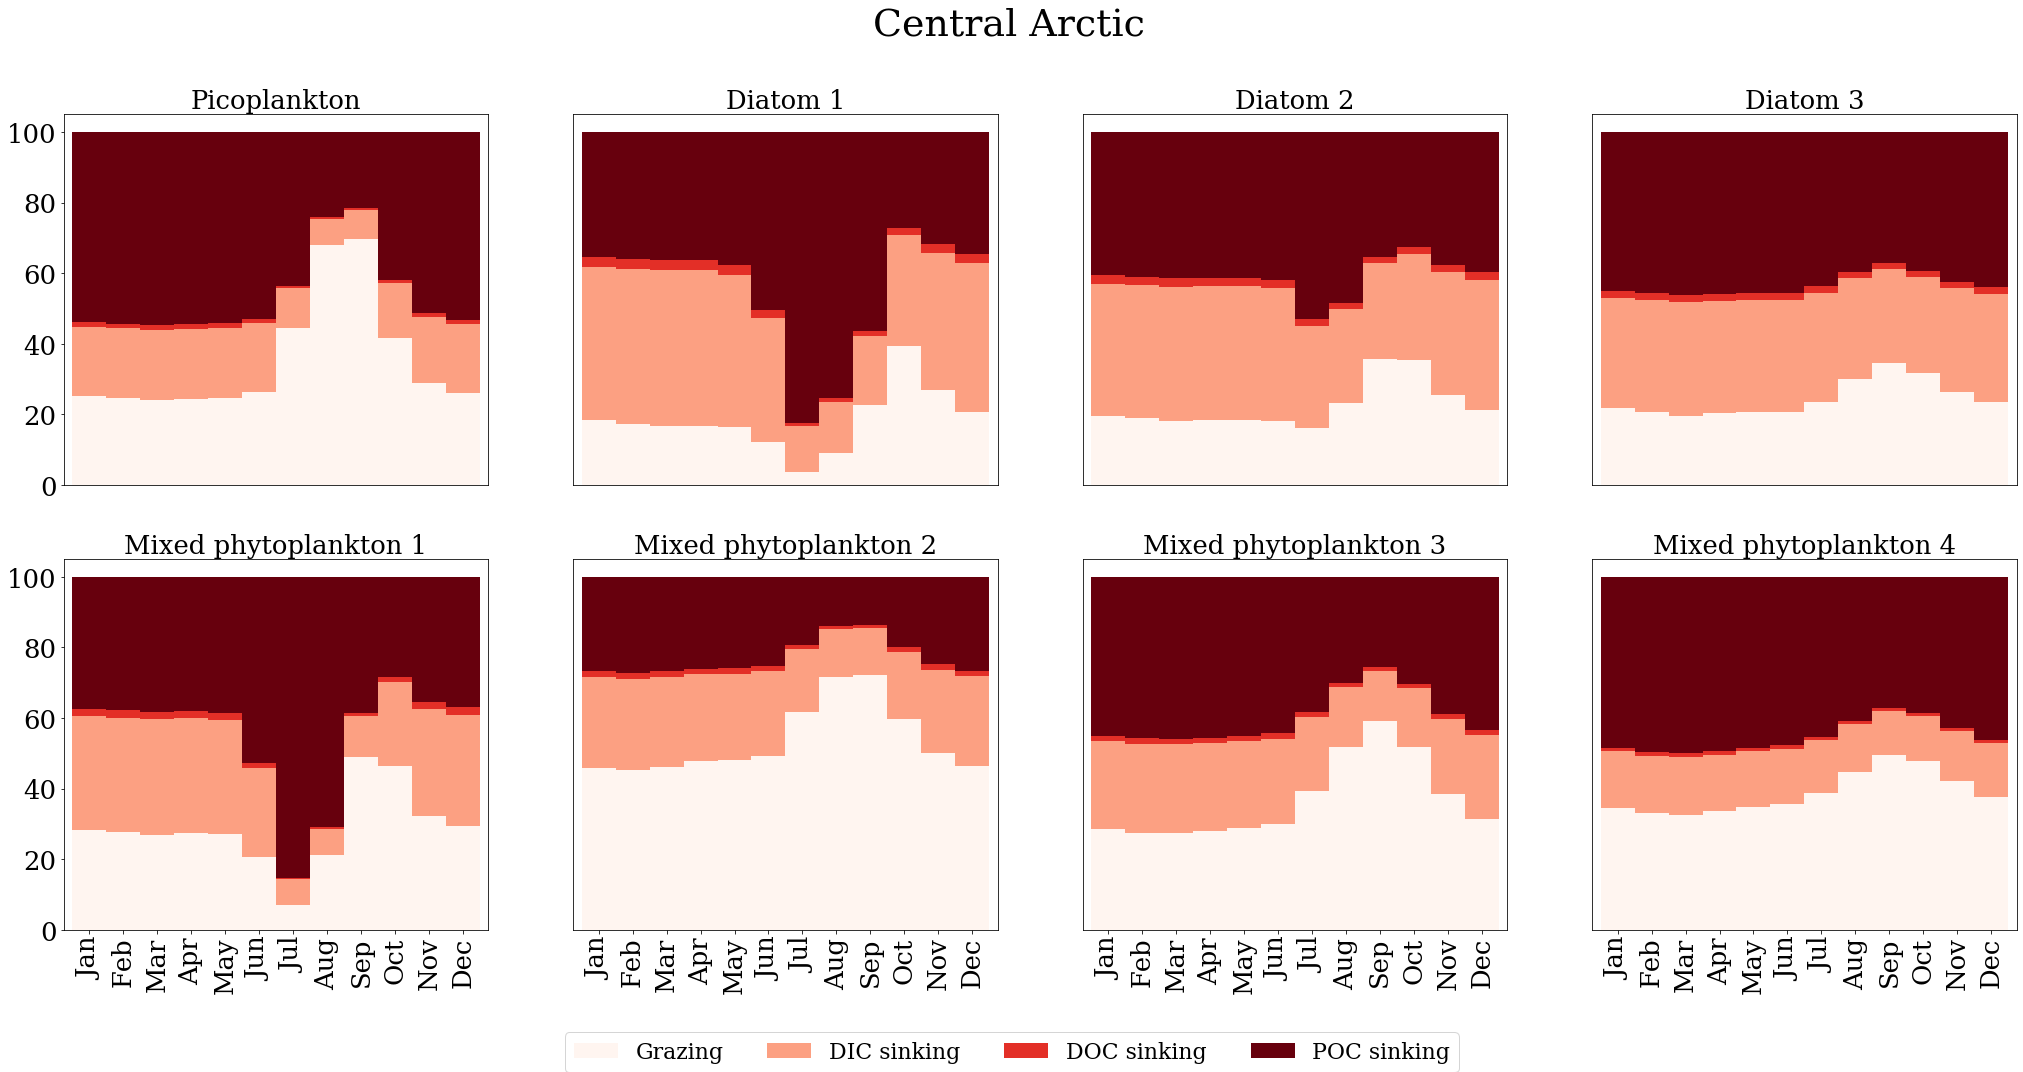

In [55]:
fig, axes = plt.subplots(nrows=2, ncols=4)
barWidth=1
axs = df_graze_pp.plot(
    x = 'month',
    kind = 'bar',
    stacked = True,
    title = 'Picoplankton',
    cmap='Reds',
    mark_right = True,
    ax=axes[0,0],legend=False,width=barWidth)
axs.xaxis.set_visible(False)

axs = df_graze_d1.plot(
    x = 'month',
    kind = 'bar',
    stacked = True,
    title = 'Diatom 1',
    cmap='Reds',
    mark_right = True,
    ax=axes[0,1],legend=False,width=barWidth)
axs.xaxis.set_visible(False)
axs.yaxis.set_visible(False)

axs = df_graze_d2.plot(
    x = 'month',
    kind = 'bar',
    stacked = True,
    title = 'Diatom 2',
    cmap='Reds',
    mark_right = True,
    ax=axes[0,2],legend=False,width=barWidth)
axs.xaxis.set_visible(False)
axs.yaxis.set_visible(False)

axs = df_graze_d3.plot(
    x = 'month',
    kind = 'bar',
    stacked = True,
    title = 'Diatom 3',
    cmap='Reds',
    mark_right = True,
    ax=axes[0,3],legend=False,width=barWidth)
axs.xaxis.set_visible(False)
axs.yaxis.set_visible(False)

axs = df_graze_mp1.plot(
    x = 'month',
    kind = 'bar',
    stacked = True,
    title = 'Mixed phytoplankton 1',
    cmap='Reds',
    mark_right = True,
    ax=axes[1,0],legend=False,width=barWidth)
axs.set_xlabel("")

axs = df_graze_mp2.plot(
    x = 'month',
    kind = 'bar',
    stacked = True,
    title = 'Mixed phytoplankton 2',
    cmap='Reds',
    mark_right = True,
    ax=axes[1,1],legend=False,width=barWidth)
axs.yaxis.set_visible(False)
axs.set_xlabel("")

axs = df_graze_mp3.plot(
    x = 'month',
    kind = 'bar',
    stacked = True,
    title = 'Mixed phytoplankton 3',
    cmap='Reds',
    mark_right = True,
    ax=axes[1,2],legend=False,width=barWidth)
axs.yaxis.set_visible(False)
axs.set_xlabel("")

axs = df_graze_mp4.plot(
    x = 'month',
    kind = 'bar',
    stacked = True,
    title = 'Mixed phytoplankton 4',
    cmap='Reds',
    mark_right = True,
    ax=axes[1,3],legend=False,width=barWidth)
axs.yaxis.set_visible(False)
axs.set_xlabel("")
fig.legend(['Grazing', 'DIC sinking', 'DOC sinking', 'POC sinking'], loc='lower center',ncol=4,borderaxespad=0., fontsize=22)
fig.suptitle('Central Arctic', fontsize=38)

In [ ]:
plankton_graze_prop = np.zeros([9,12,180,360])
plankton_loss_prop = np.zeros([9,12,180,360])
for i in range(0,9):
    plankton_graze_prop[i,:,:,:] = graze_regrid[i,:,:,:]/(graze_regrid[i,:,:,:]+loss_regrid[i,:,:,:])*100
    plankton_loss_prop[i,:,:,:]  = loss_regrid[i,:,:,:]/(loss_regrid[i,:,:,:]+graze_regrid[i,:,:,:])*100
    

In [11]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (35, 15),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'font.family':'serif',
         'font.size': 18}
pylab.rcParams.update(params)

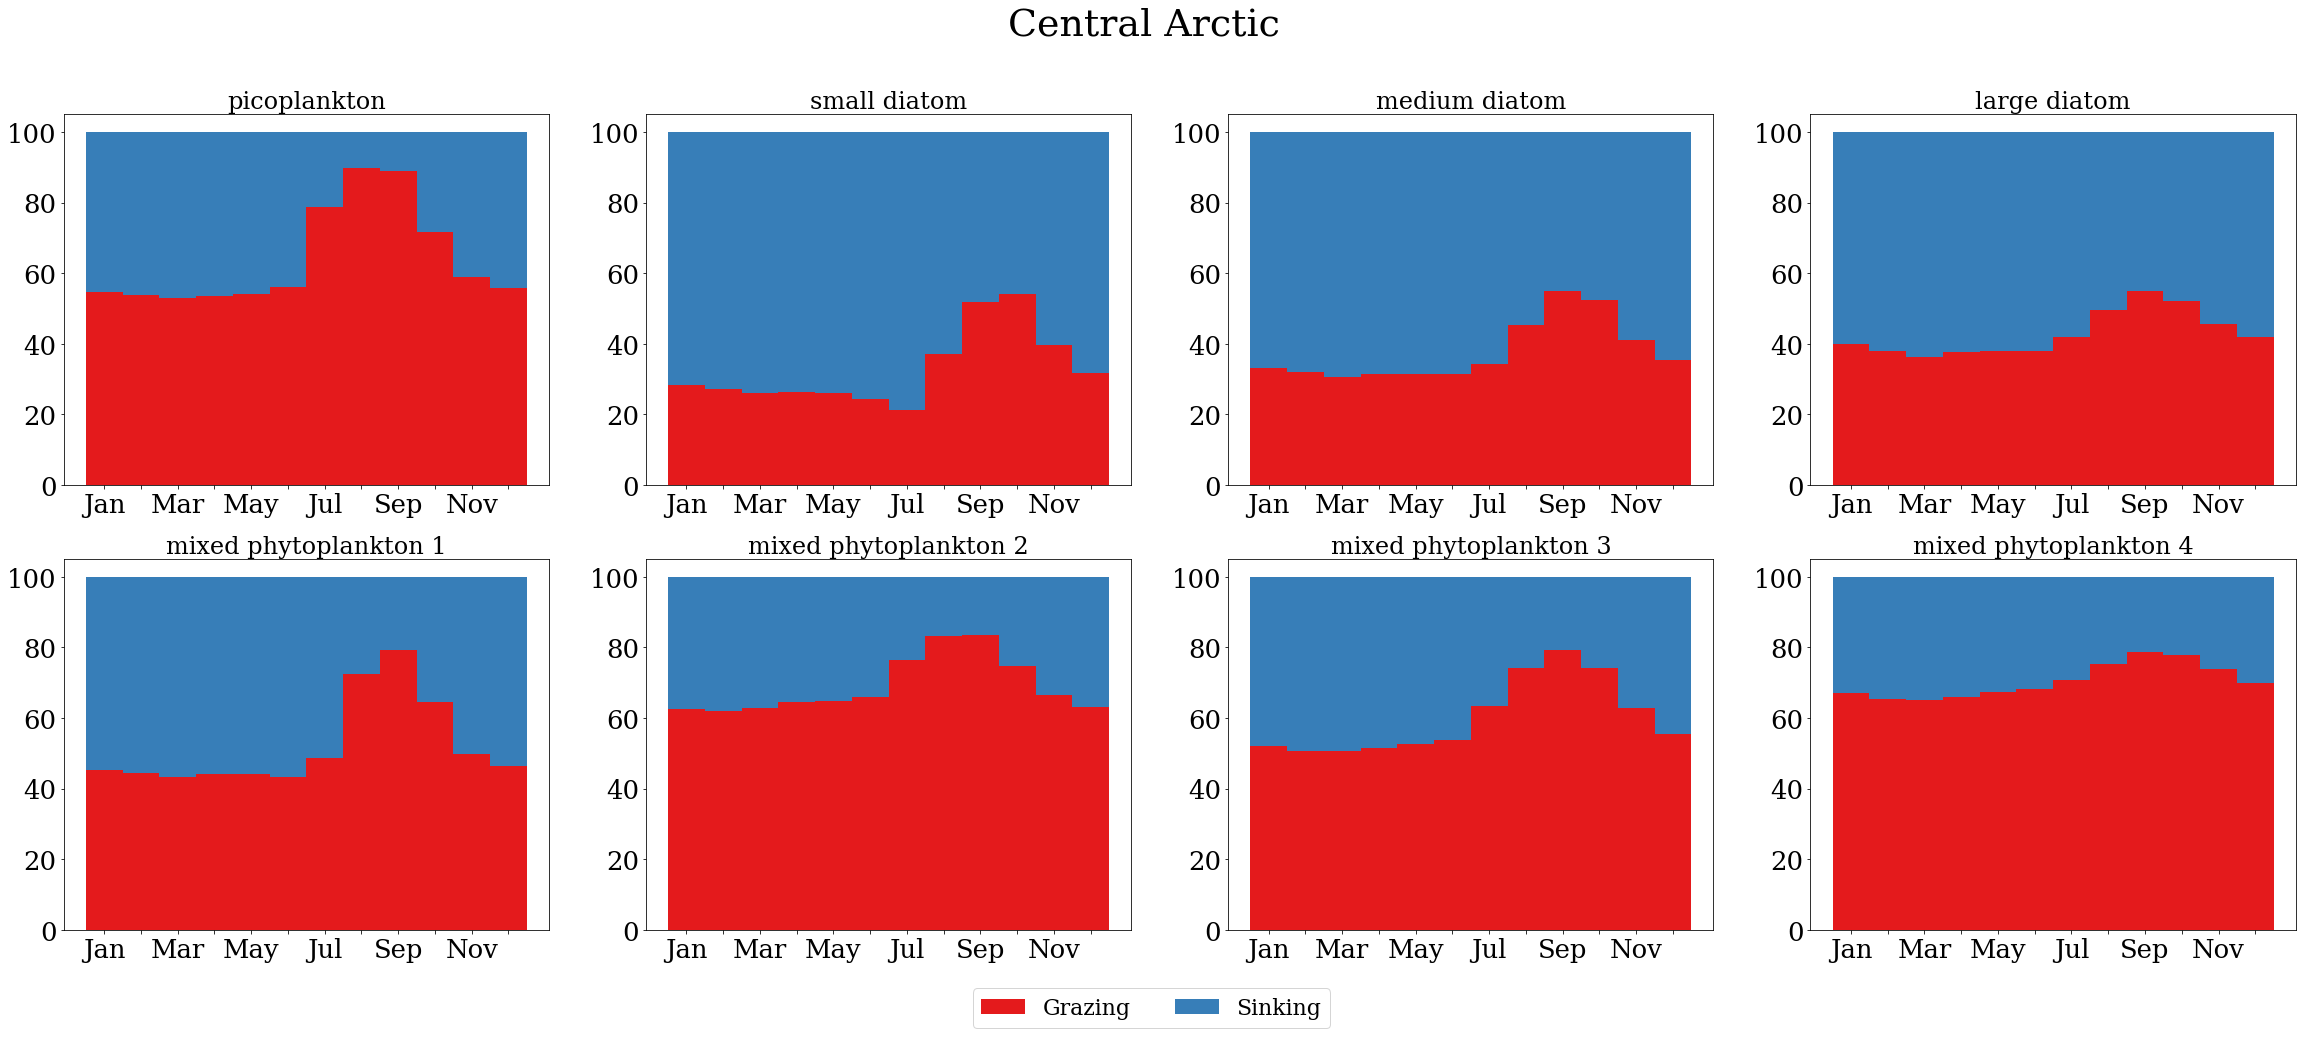

In [12]:
fig = plt.figure(figsize=(40, 15)) 
barWidth=1
x = months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
phyto_names = ['small diatom', 'medium diatom', 'large diatom', 'mixed phytoplankton 1', 
           'mixed phytoplankton 2', 'mixed phytoplankton 3', 'mixed phytoplankton 4',
           'picoplankton']
pal = sns.color_palette("Set1")

for i in range(0,8):
    ax = fig.add_subplot(2, 4, i+1)
    ax.bar(x,np.nanmean(plankton_graze_prop[i,:,170:180,:], axis=(1,2)),color=pal[0],width=barWidth)
    ax.bar(x,np.nanmean(plankton_loss_prop[i,:,170:180,:], axis=(1,2)),bottom=np.nanmean(plankton_graze_prop[i,:,170:180,:], axis=(1,2)),color=pal[1],width=barWidth)
    ax.set_title(''+str(phyto_names[i-1]), fontsize=24)
    ax.set_xticklabels(['Jan','','Mar','','May','','Jul','','Sep','','Nov',''])
    
fig.legend(['Grazing', 'Sinking'], loc='lower center',ncol=2,borderaxespad=1., fontsize=22)
fig.suptitle('Central Arctic', fontsize=38)
figures_file = '/glade/u/home/gabyn/case_notes/analysis_figures'
fig.savefig(''+figures_file+'/'+new_file+'/sinking_vs_grazing_ao_regrid'+year+'_year.png')

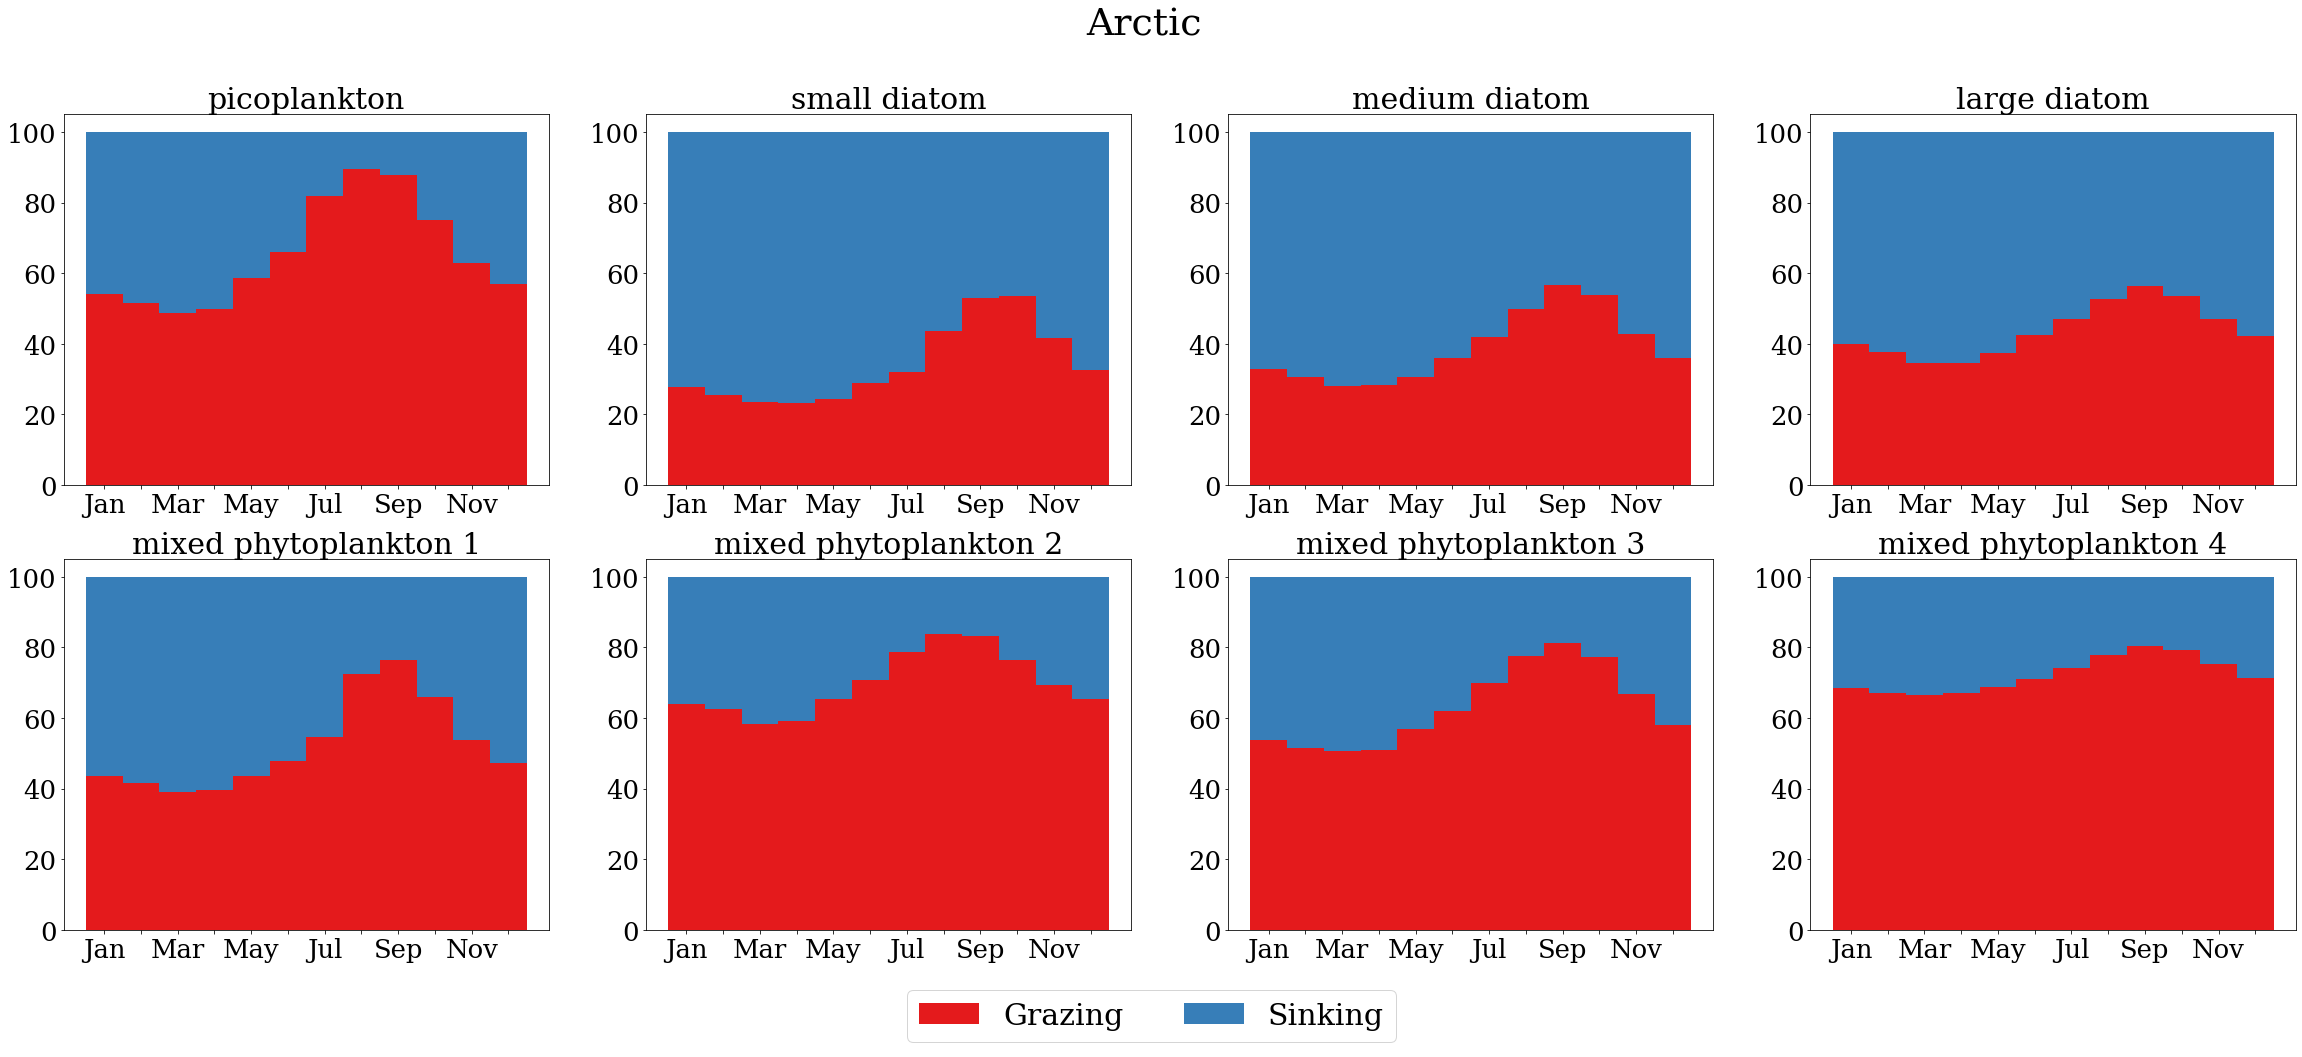

In [13]:
fig = plt.figure(figsize=(40, 15)) 
barWidth=1
x = months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
phyto_names = ['small diatom', 'medium diatom', 'large diatom', 'mixed phytoplankton 1', 
           'mixed phytoplankton 2', 'mixed phytoplankton 3', 'mixed phytoplankton 4',
           'picoplankton']
pal = sns.color_palette("Set1")

for i in range(0,8):
    ax = fig.add_subplot(2, 4, i+1)
    ax.bar(x,np.nanmean(plankton_graze_prop[i,:,149:180,:], axis=(1,2)),color=pal[0],width=barWidth)
    ax.bar(x,np.nanmean(plankton_loss_prop[i,:,149:180,:], axis=(1,2)),bottom=np.nanmean(plankton_graze_prop[i,:,149:180,:], axis=(1,2)),color=pal[1],width=barWidth)
    ax.set_title(''+str(phyto_names[i-1]), fontsize=30)
    ax.set_xticklabels(['Jan','','Mar','','May','','Jul','','Sep','','Nov',''])
    
fig.legend(['Grazing', 'Sinking'], loc='lower center',ncol=2,borderaxespad=.5, fontsize=30)
fig.suptitle('Arctic', fontsize=38)
fig.savefig(''+figures_file+'/'+new_file+'/sinking_vs_grazing_arctic_regrid'+year+'_year.png')



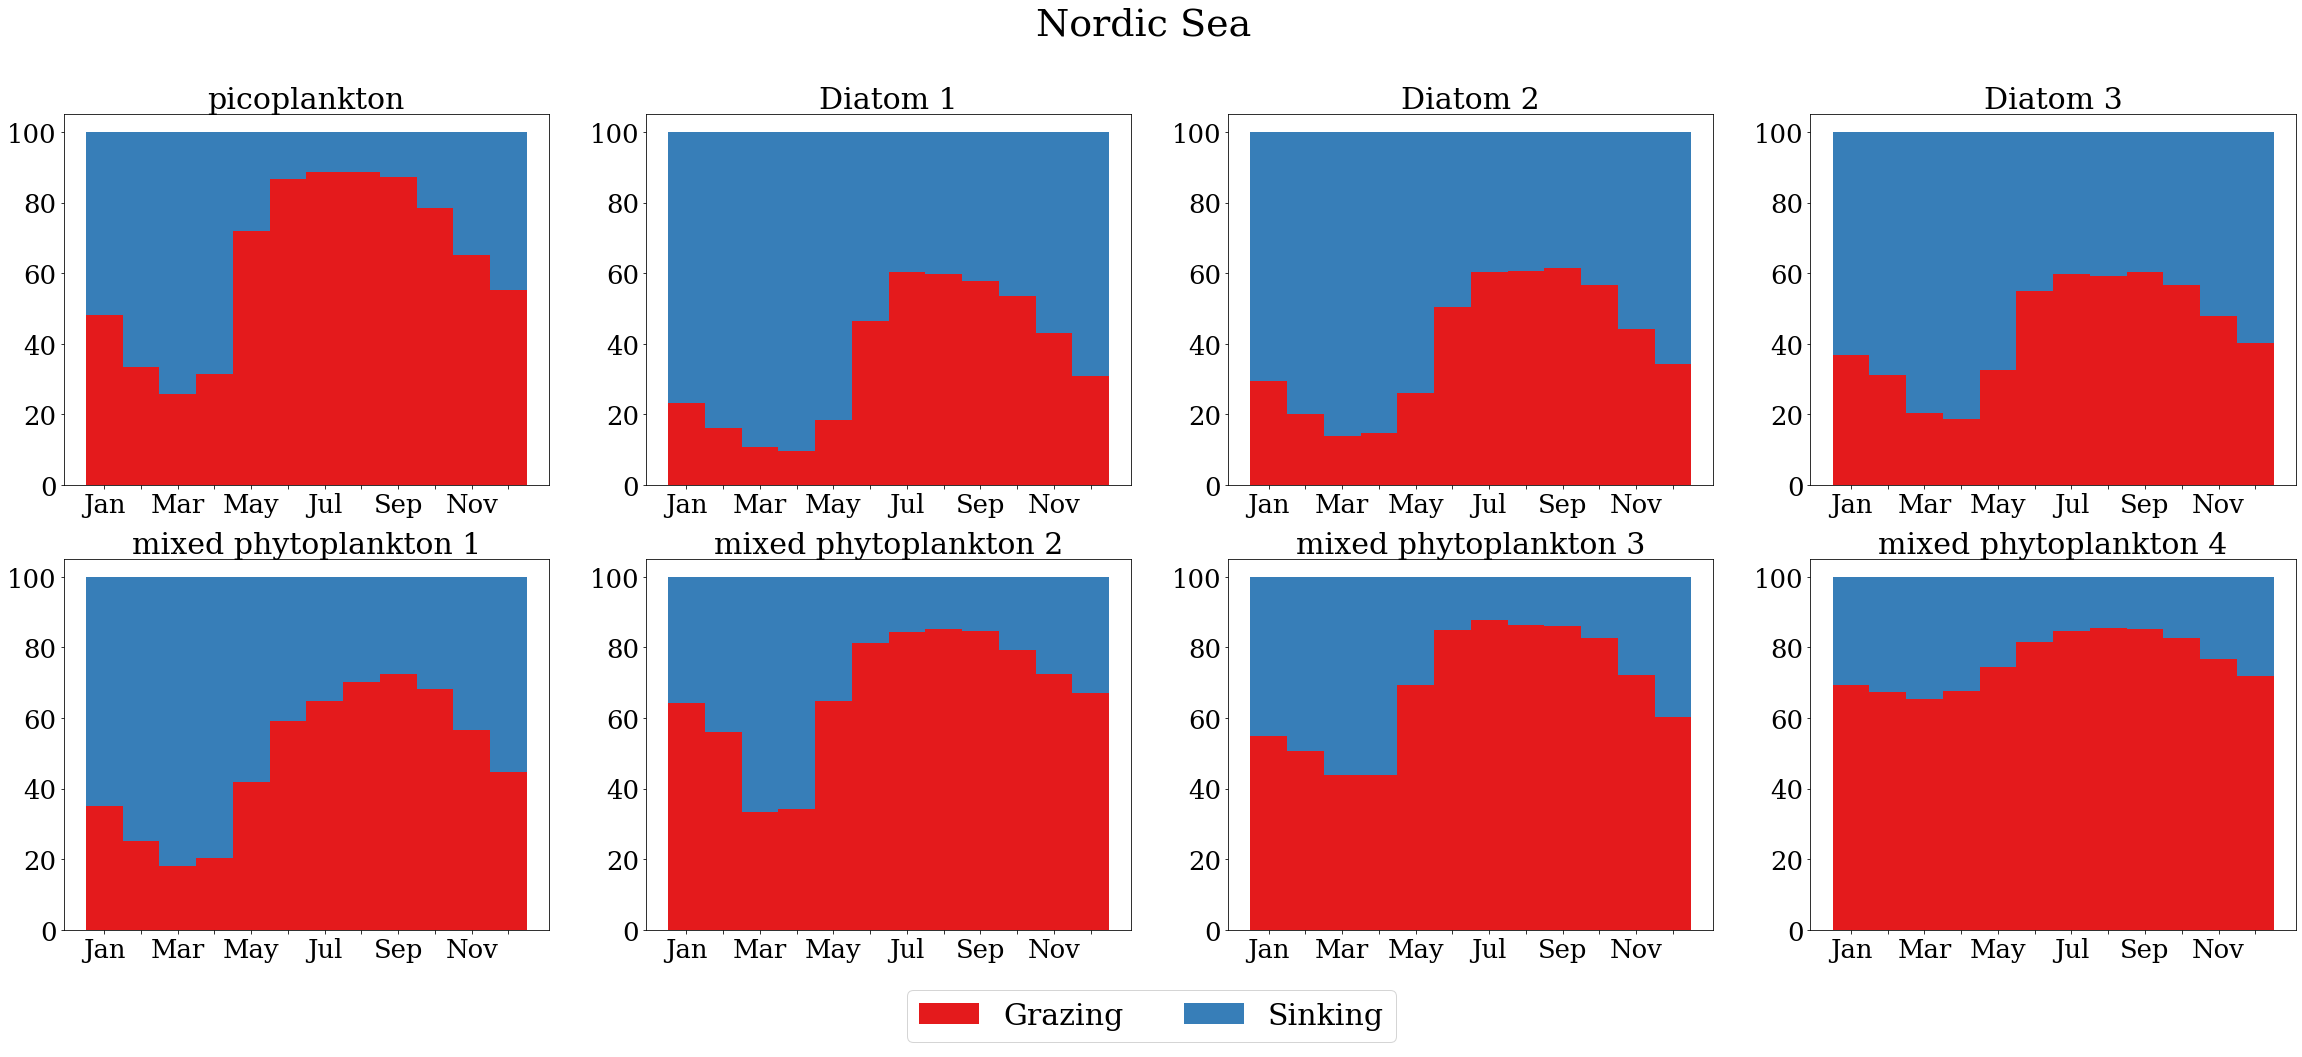

In [14]:
fig = plt.figure(figsize=(40, 15)) 
barWidth=1
x = months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
phyto_names = ['Diatom 1', 'Diatom 2', 'Diatom 3', 'mixed phytoplankton 1', 
           'mixed phytoplankton 2', 'mixed phytoplankton 3', 'mixed phytoplankton 4',
           'picoplankton']
pal = sns.color_palette("Set1")

for i in range(0,8):
    ax = fig.add_subplot(2, 4, i+1)
    ax.bar(x,np.nanmean(plankton_graze_prop[i,:,149:170,155:205], axis=(1,2)),color=pal[0],width=barWidth)
    ax.bar(x,np.nanmean(plankton_loss_prop[i,:,149:170,155:205], axis=(1,2)),bottom=np.nanmean(plankton_graze_prop[i,:,149:170,155:205], axis=(1,2)),color=pal[1],width=barWidth)
    ax.set_title(''+str(phyto_names[i-1]), fontsize=30)
    ax.set_xticklabels(['Jan','','Mar','','May','','Jul','','Sep','','Nov',''])
    
fig.legend(['Grazing', 'Sinking'], loc='lower center',ncol=2,borderaxespad=.5, fontsize=30)
fig.suptitle('Nordic Sea', fontsize=38)
fig.savefig(''+figures_file+'/'+new_file+'/sinking_vs_grazing_nordic_regrid'+year+'_year.png')

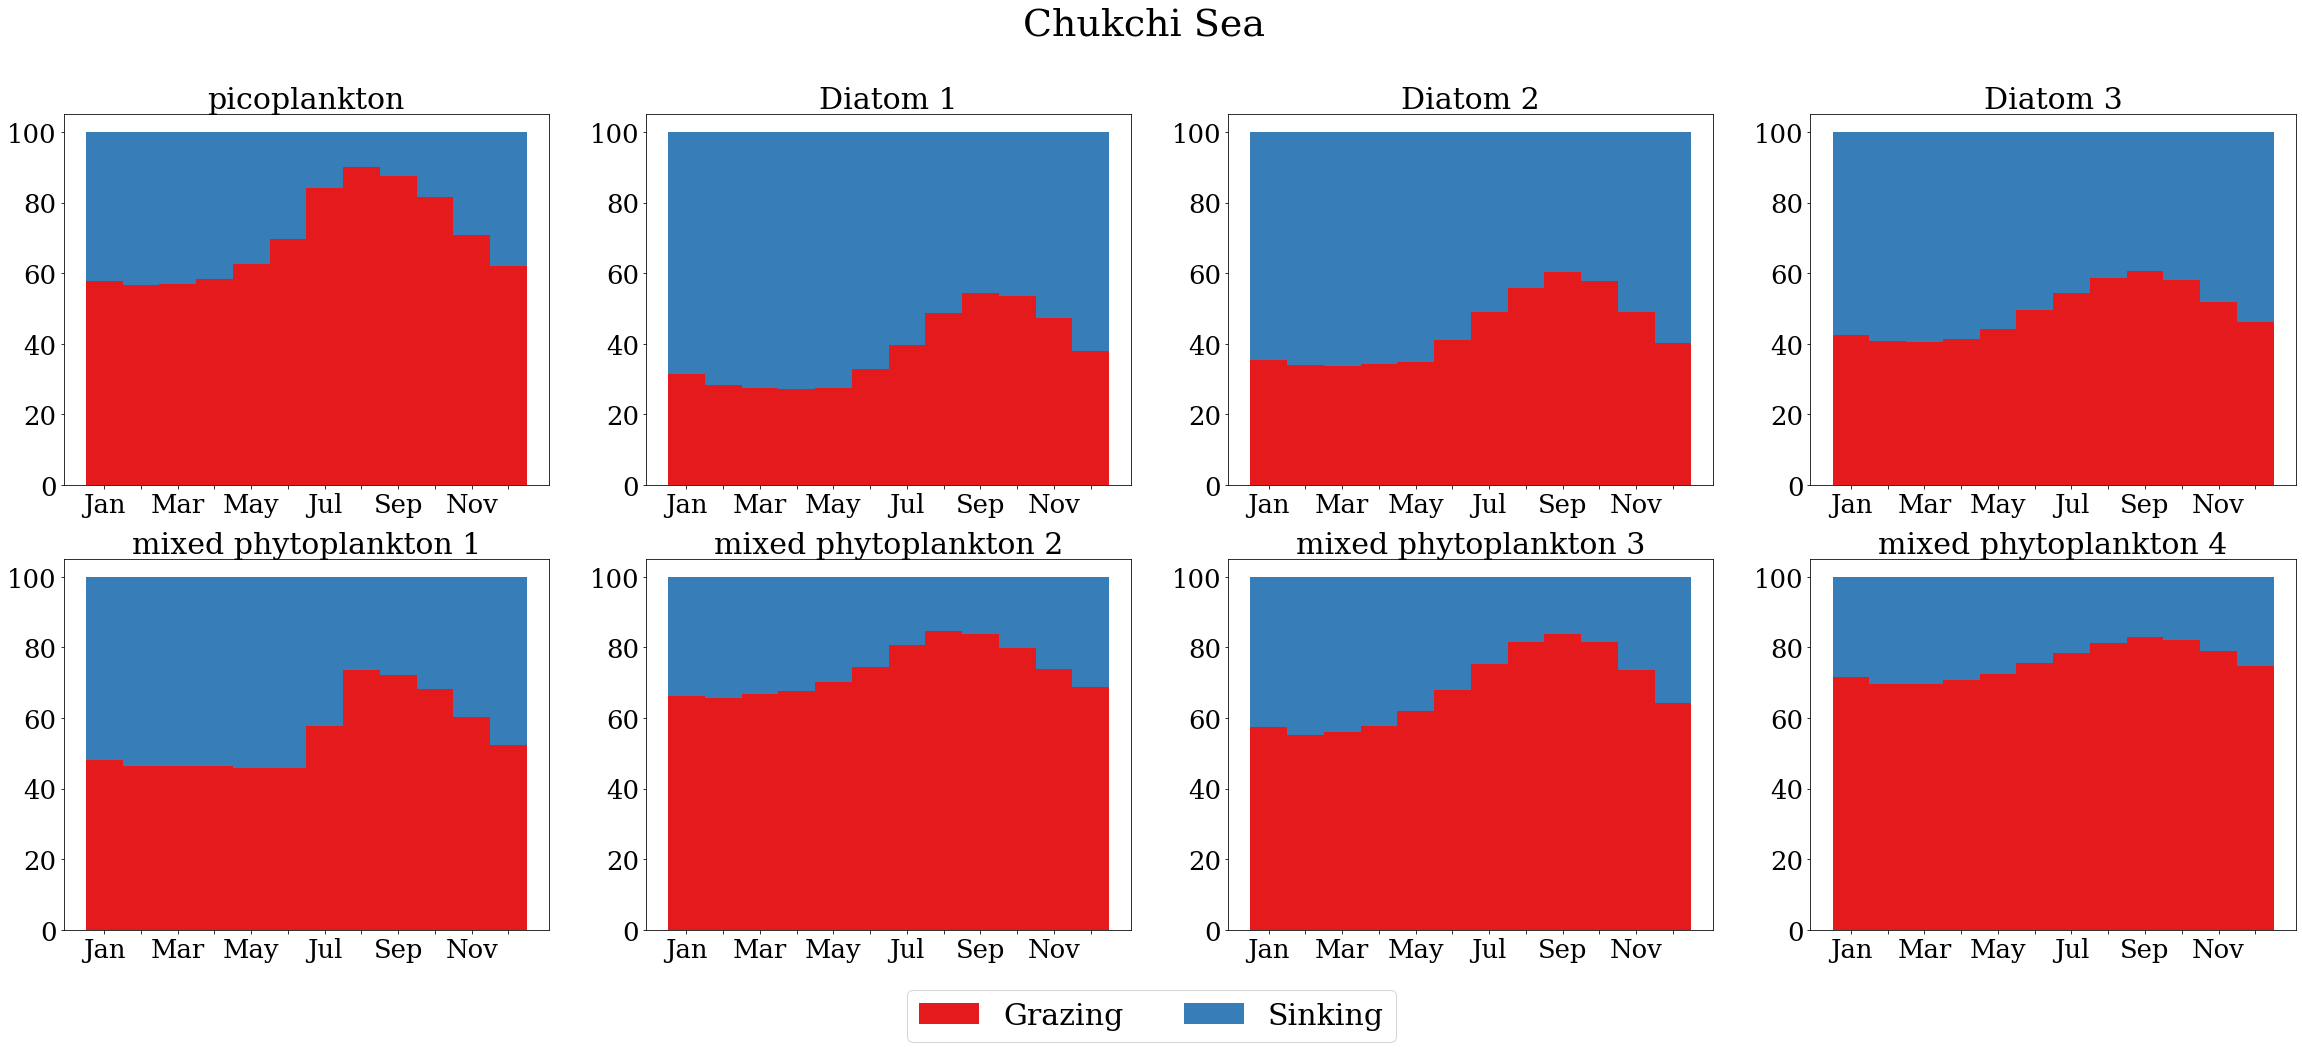

In [15]:
fig = plt.figure(figsize=(40, 15)) 
barWidth=1
x = months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
phyto_names = ['Diatom 1', 'Diatom 2', 'Diatom 3', 'mixed phytoplankton 1', 
           'mixed phytoplankton 2', 'mixed phytoplankton 3', 'mixed phytoplankton 4',
           'picoplankton']
pal = sns.color_palette("Set1")

for i in range(0,8):
    ax = fig.add_subplot(2, 4, i+1)
    ax.bar(x,np.nanmean(plankton_graze_prop[i,:,149:170,0:25], axis=(1,2)),color=pal[0],width=barWidth)
    ax.bar(x,np.nanmean(plankton_loss_prop[i,:,149:170,0:25], axis=(1,2)),bottom=np.nanmean(plankton_graze_prop[i,:,149:170,0:25], axis=(1,2)),color=pal[1],width=barWidth)
    ax.set_title(''+str(phyto_names[i-1]), fontsize=30)
    ax.set_xticklabels(['Jan','','Mar','','May','','Jul','','Sep','','Nov',''])
    
fig.legend(['Grazing', 'Sinking'], loc='lower center',ncol=2,borderaxespad=.5, fontsize=30)
fig.suptitle('Chukchi Sea', fontsize=38)
fig.savefig(''+figures_file+'/'+new_file+'/sinking_vs_grazing_cs_regrid'+year+'_year.png')

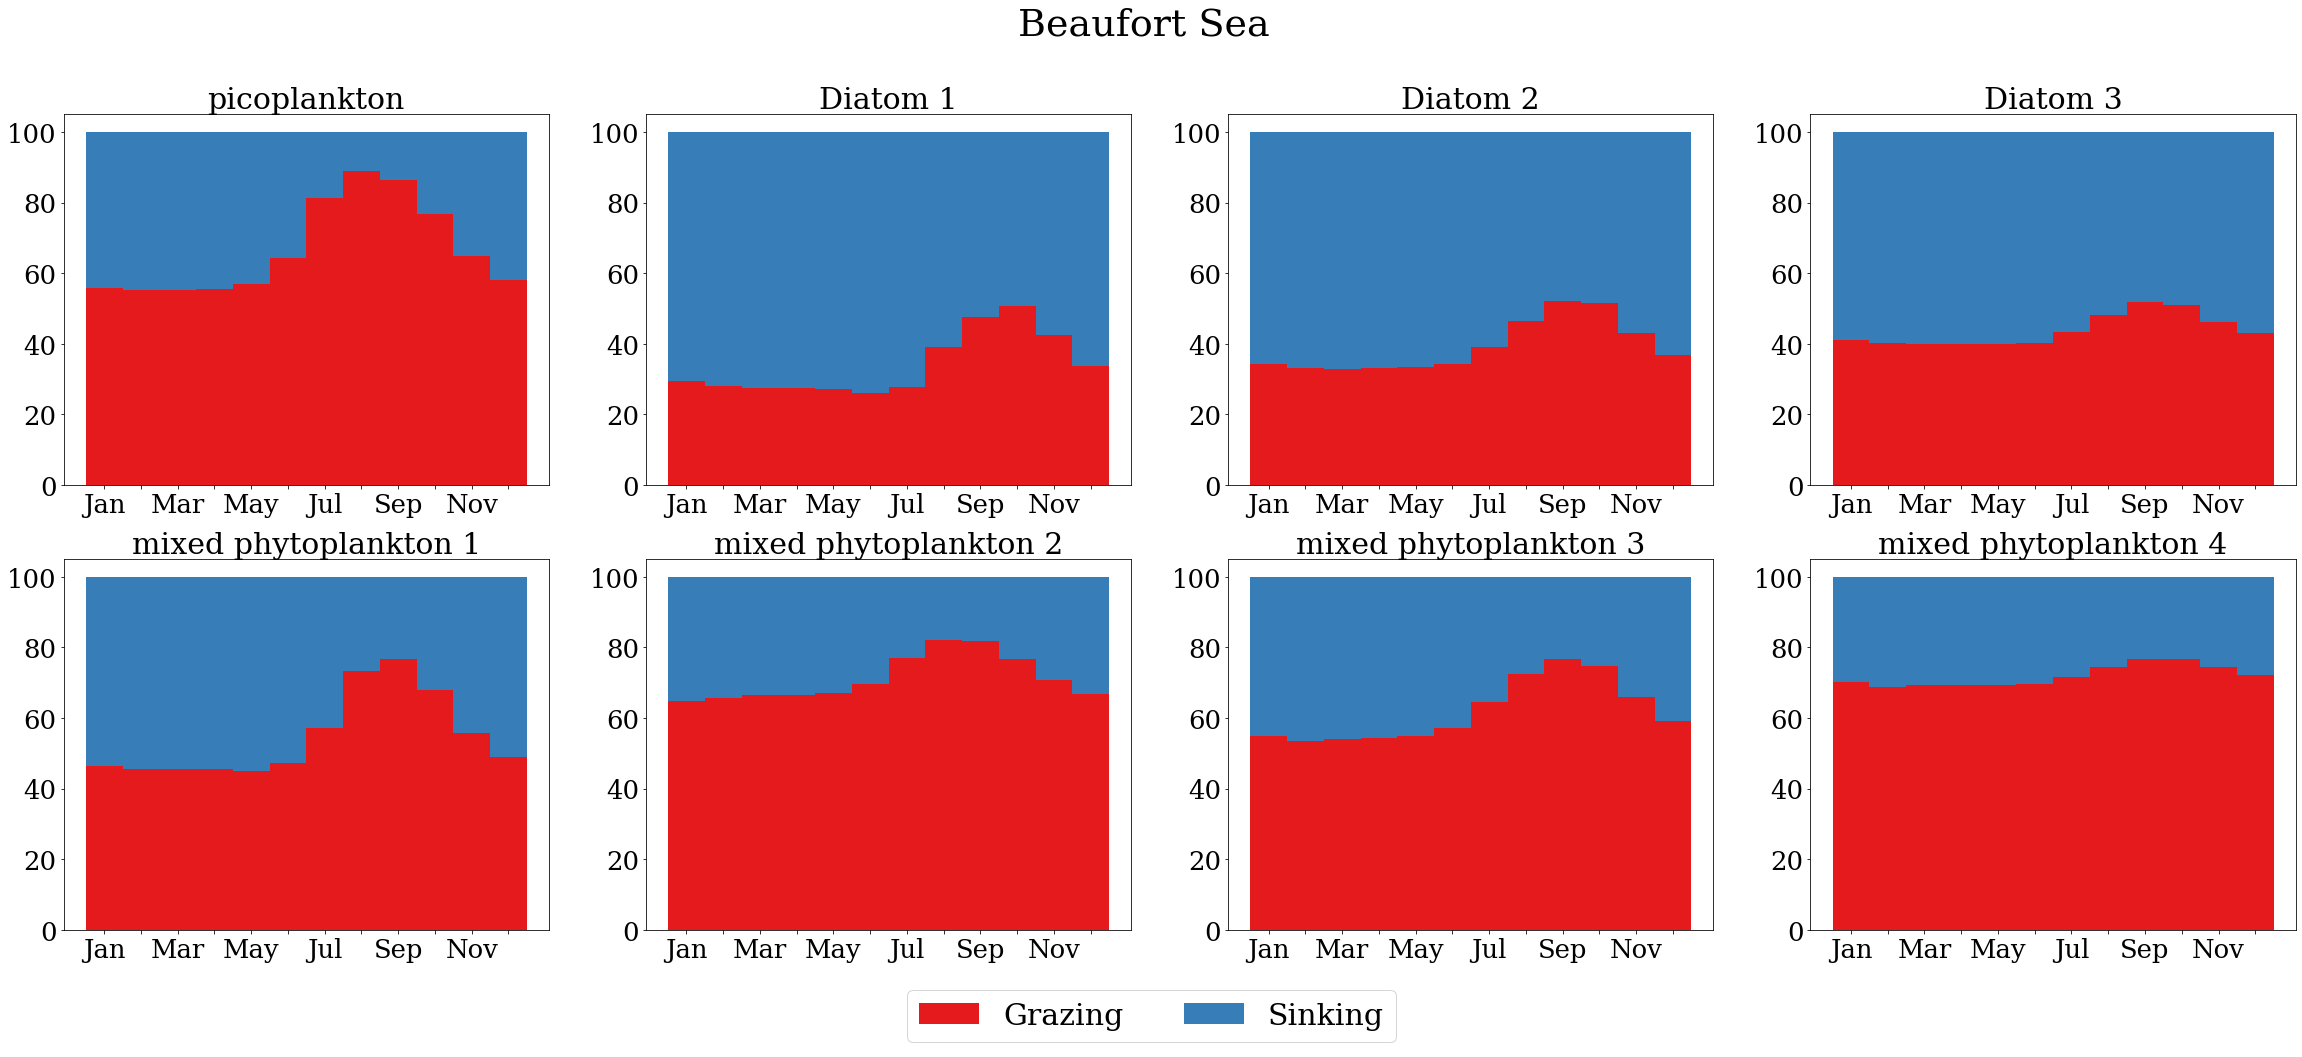

In [16]:
fig = plt.figure(figsize=(40, 15)) 
barWidth=1
x = months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
phyto_names = ['Diatom 1', 'Diatom 2', 'Diatom 3', 'mixed phytoplankton 1', 
           'mixed phytoplankton 2', 'mixed phytoplankton 3', 'mixed phytoplankton 4',
           'picoplankton']
pal = sns.color_palette("Set1")

for i in range(0,8):
    ax = fig.add_subplot(2, 4, i+1)
    ax.bar(x,np.nanmean(plankton_graze_prop[i,:,149:170,25:55], axis=(1,2)),color=pal[0],width=barWidth)
    ax.bar(x,np.nanmean(plankton_loss_prop[i,:,149:170,25:55], axis=(1,2)),bottom=np.nanmean(plankton_graze_prop[i,:,149:170,25:55], axis=(1,2)),color=pal[1],width=barWidth)
    ax.set_title(''+str(phyto_names[i-1]), fontsize=30)
    ax.set_xticklabels(['Jan','','Mar','','May','','Jul','','Sep','','Nov',''])
    
fig.legend(['Grazing', 'Sinking'], loc='lower center',ncol=2,borderaxespad=.5, fontsize=30)
fig.suptitle('Beaufort Sea', fontsize=38)
fig.savefig(''+figures_file+'/'+new_file+'/sinking_vs_grazing_bs_regrid'+year+'_year.png')

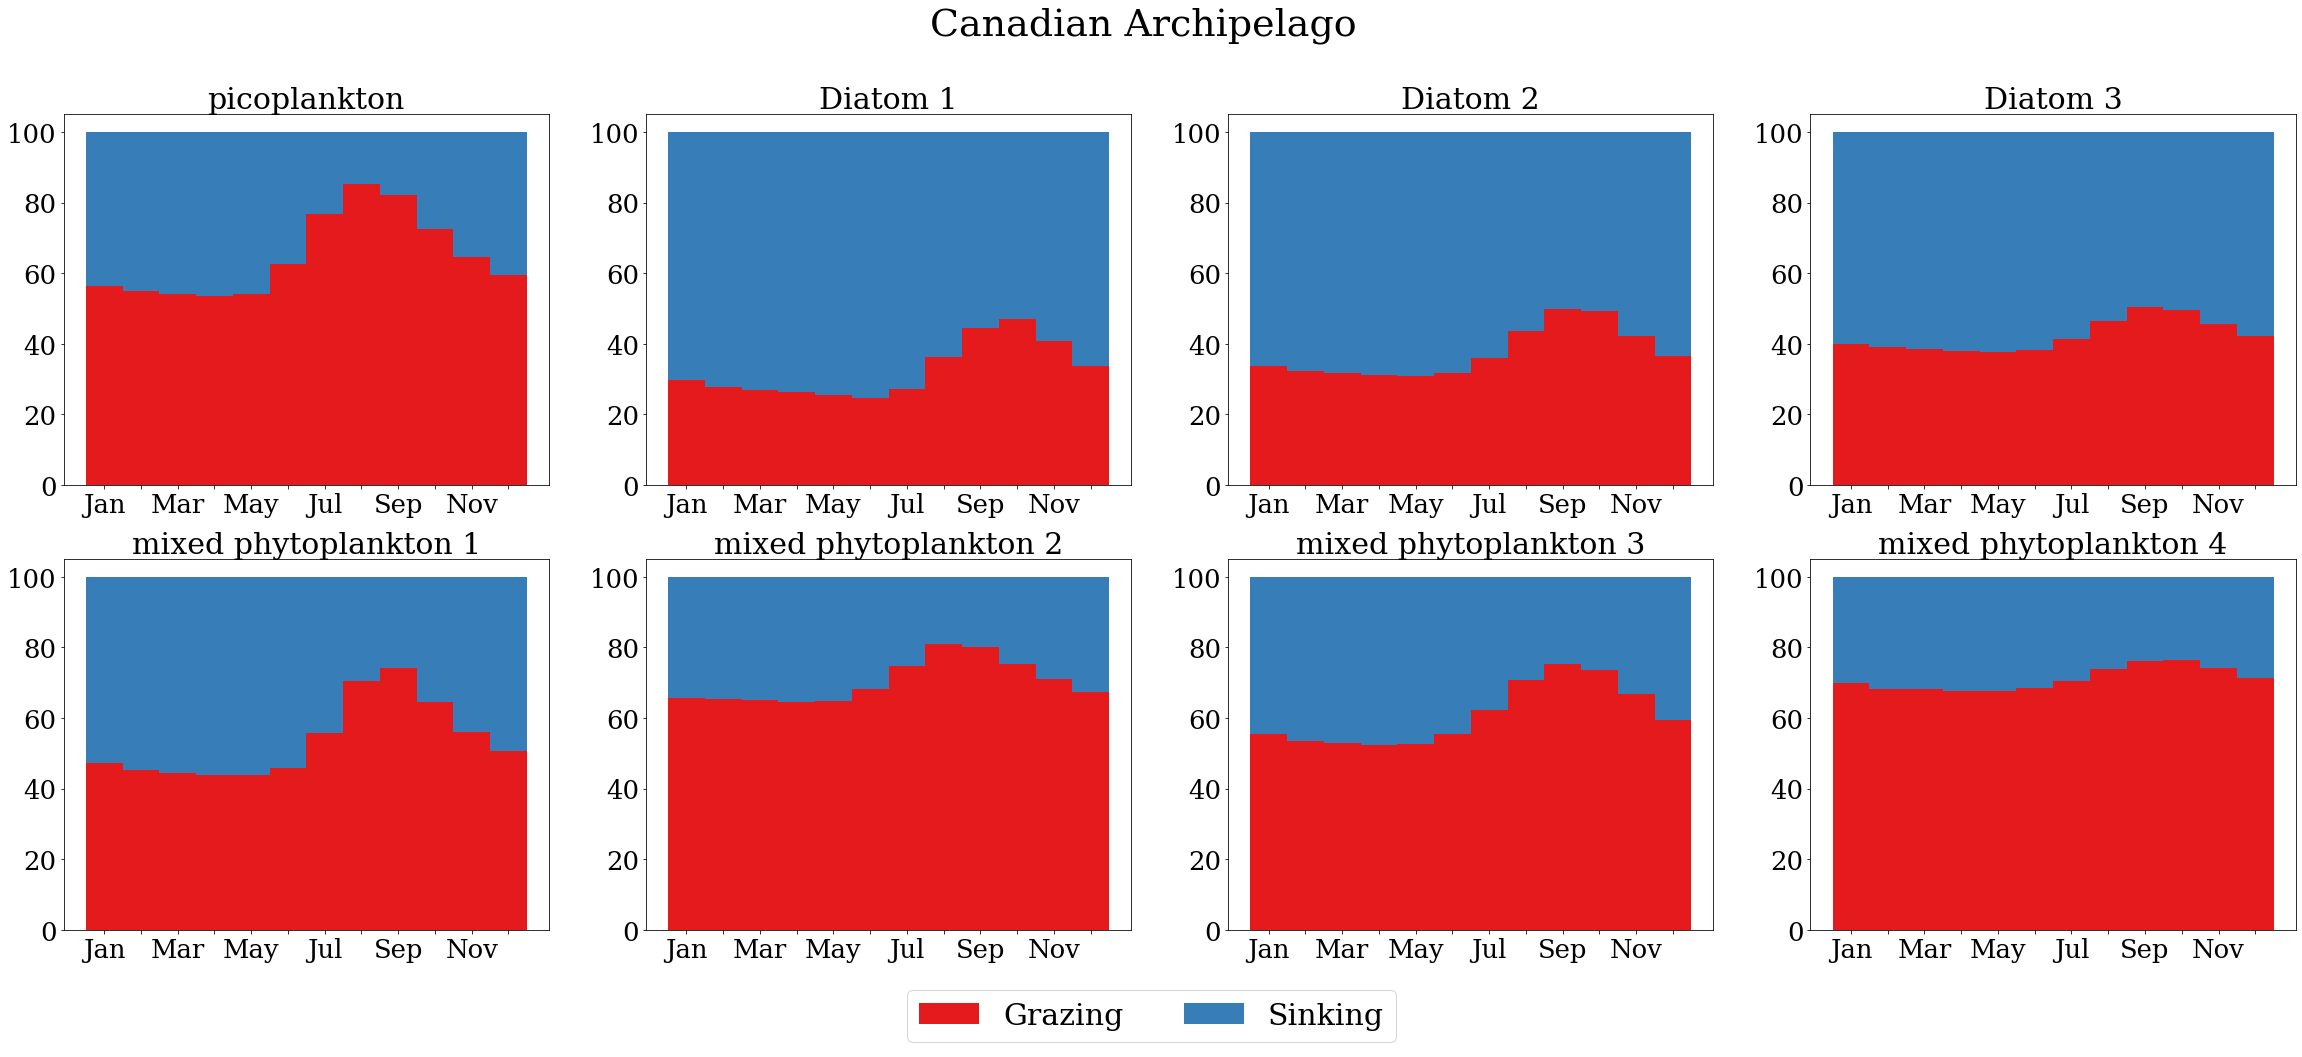

In [17]:
fig = plt.figure(figsize=(40, 15)) 
barWidth=1
x = months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
phyto_names = ['Diatom 1', 'Diatom 2', 'Diatom 3', 'mixed phytoplankton 1', 
           'mixed phytoplankton 2', 'mixed phytoplankton 3', 'mixed phytoplankton 4',
           'picoplankton']
pal = sns.color_palette("Set1")

for i in range(0,8):
    ax = fig.add_subplot(2, 4, i+1)
    ax.bar(x,np.nanmean(plankton_graze_prop[i,:,149:170,55:110], axis=(1,2)),color=pal[0],width=barWidth)
    ax.bar(x,np.nanmean(plankton_loss_prop[i,:,149:170,55:110], axis=(1,2)),bottom=np.nanmean(plankton_graze_prop[i,:,149:170,55:110], axis=(1,2)),color=pal[1],width=barWidth)
    ax.set_title(''+str(phyto_names[i-1]), fontsize=30)
    ax.set_xticklabels(['Jan','','Mar','','May','','Jul','','Sep','','Nov',''])
    
fig.legend(['Grazing', 'Sinking'], loc='lower center',ncol=2,borderaxespad=.5, fontsize=30)
fig.suptitle('Canadian Archipelago', fontsize=38)
fig.savefig(''+figures_file+'/'+new_file+'/sinking_vs_grazing_ca_regrid'+year+'_year.png')

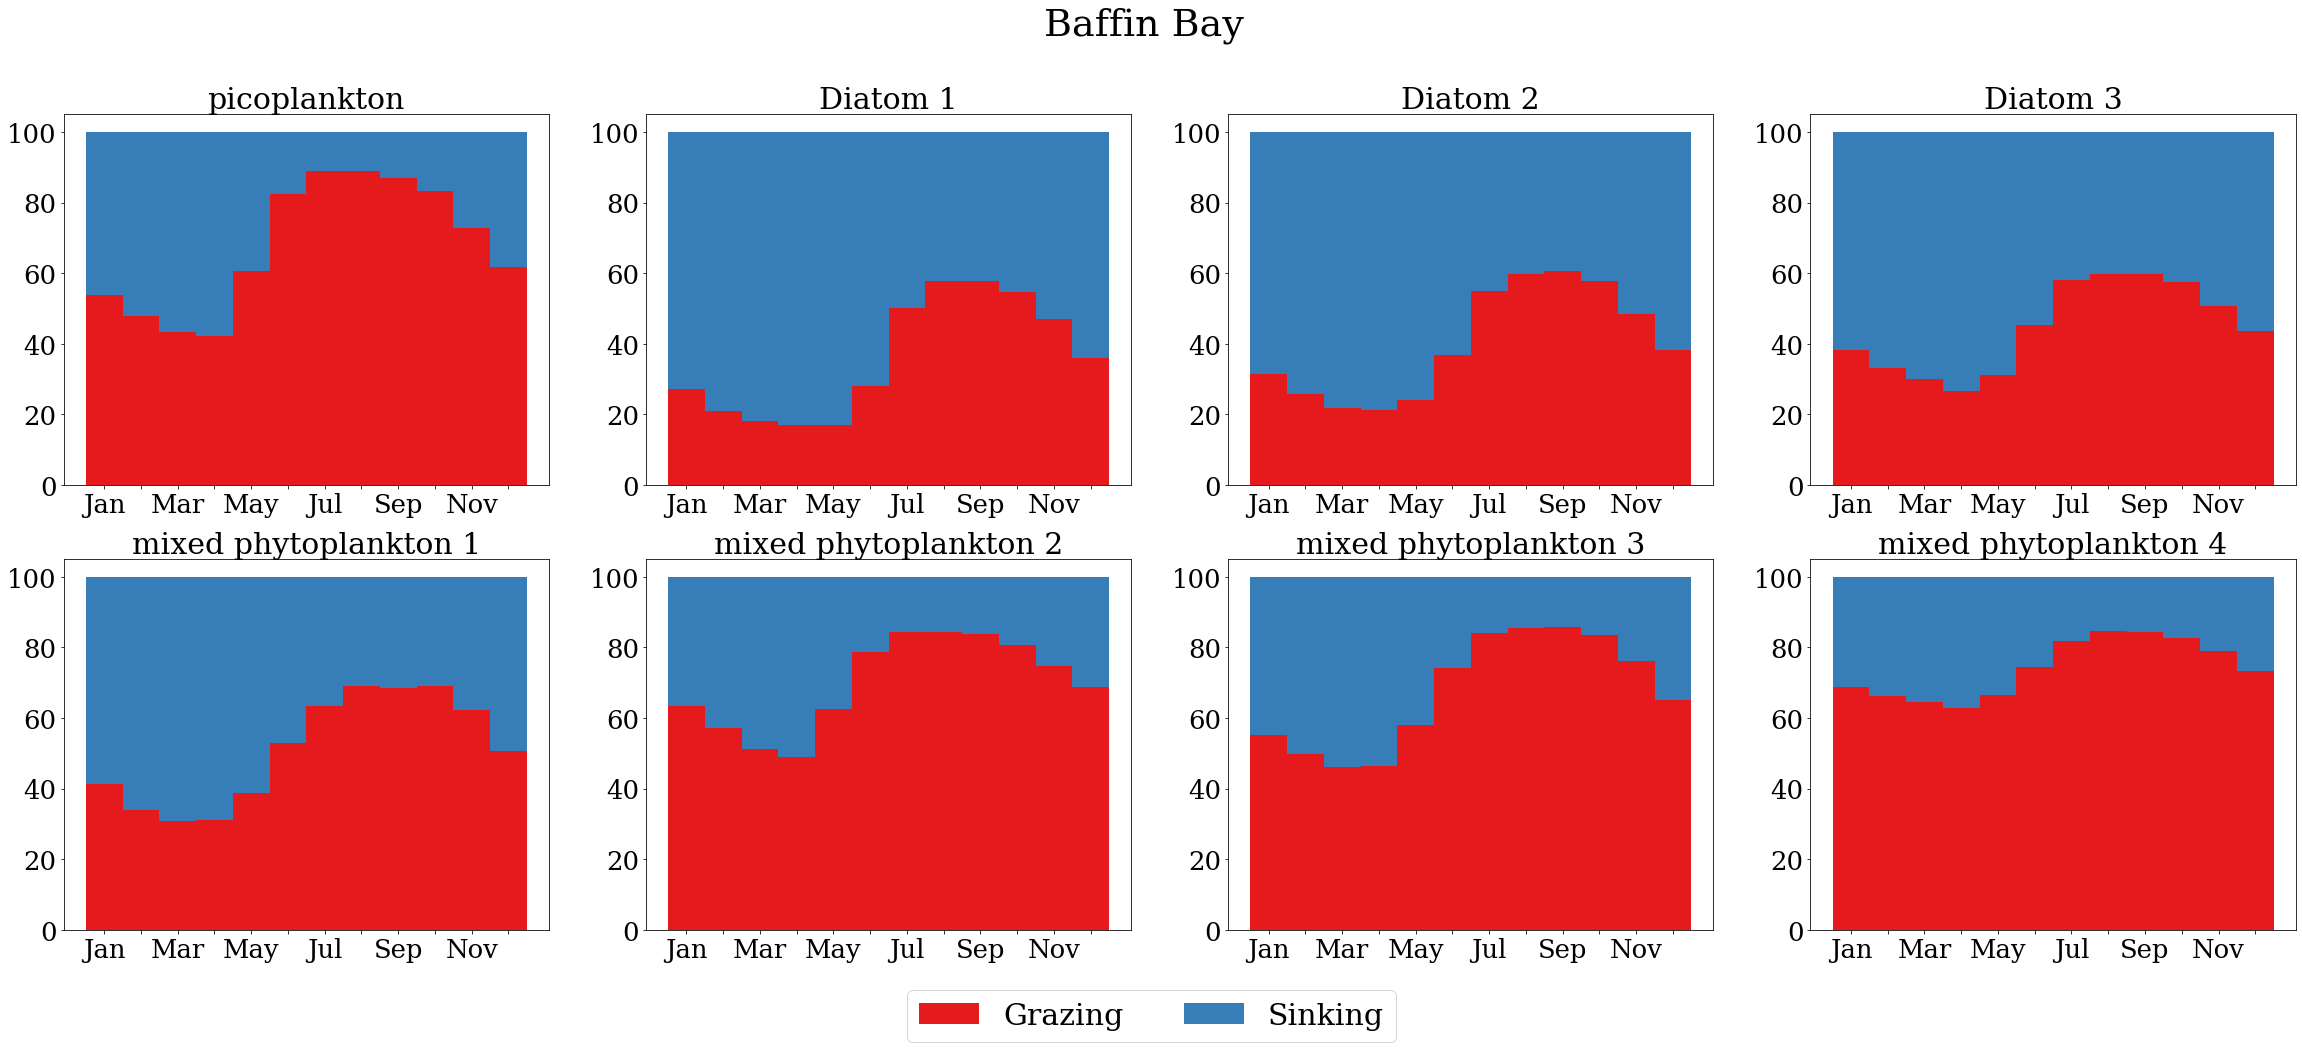

In [18]:
fig = plt.figure(figsize=(40, 15)) 
barWidth=1
x = months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
phyto_names = ['Diatom 1', 'Diatom 2', 'Diatom 3', 'mixed phytoplankton 1', 
           'mixed phytoplankton 2', 'mixed phytoplankton 3', 'mixed phytoplankton 4',
           'picoplankton']
pal = sns.color_palette("Set1")

for i in range(0,8):
    ax = fig.add_subplot(2, 4, i+1)
    ax.bar(x,np.nanmean(plankton_graze_prop[i,:,149:170,110:135], axis=(1,2)),color=pal[0],width=barWidth)
    ax.bar(x,np.nanmean(plankton_loss_prop[i,:,149:170,110:135], axis=(1,2)),bottom=np.nanmean(plankton_graze_prop[i,:,149:170,110:135], axis=(1,2)),color=pal[1],width=barWidth)
    ax.set_title(''+str(phyto_names[i-1]), fontsize=30)
    ax.set_xticklabels(['Jan','','Mar','','May','','Jul','','Sep','','Nov',''])
    
fig.legend(['Grazing', 'Sinking'], loc='lower center',ncol=2,borderaxespad=.5, fontsize=30)
fig.suptitle('Baffin Bay', fontsize=38)
fig.savefig(''+figures_file+'/'+new_file+'/sinking_vs_grazing_bb_regrid'+year+'_year.png')

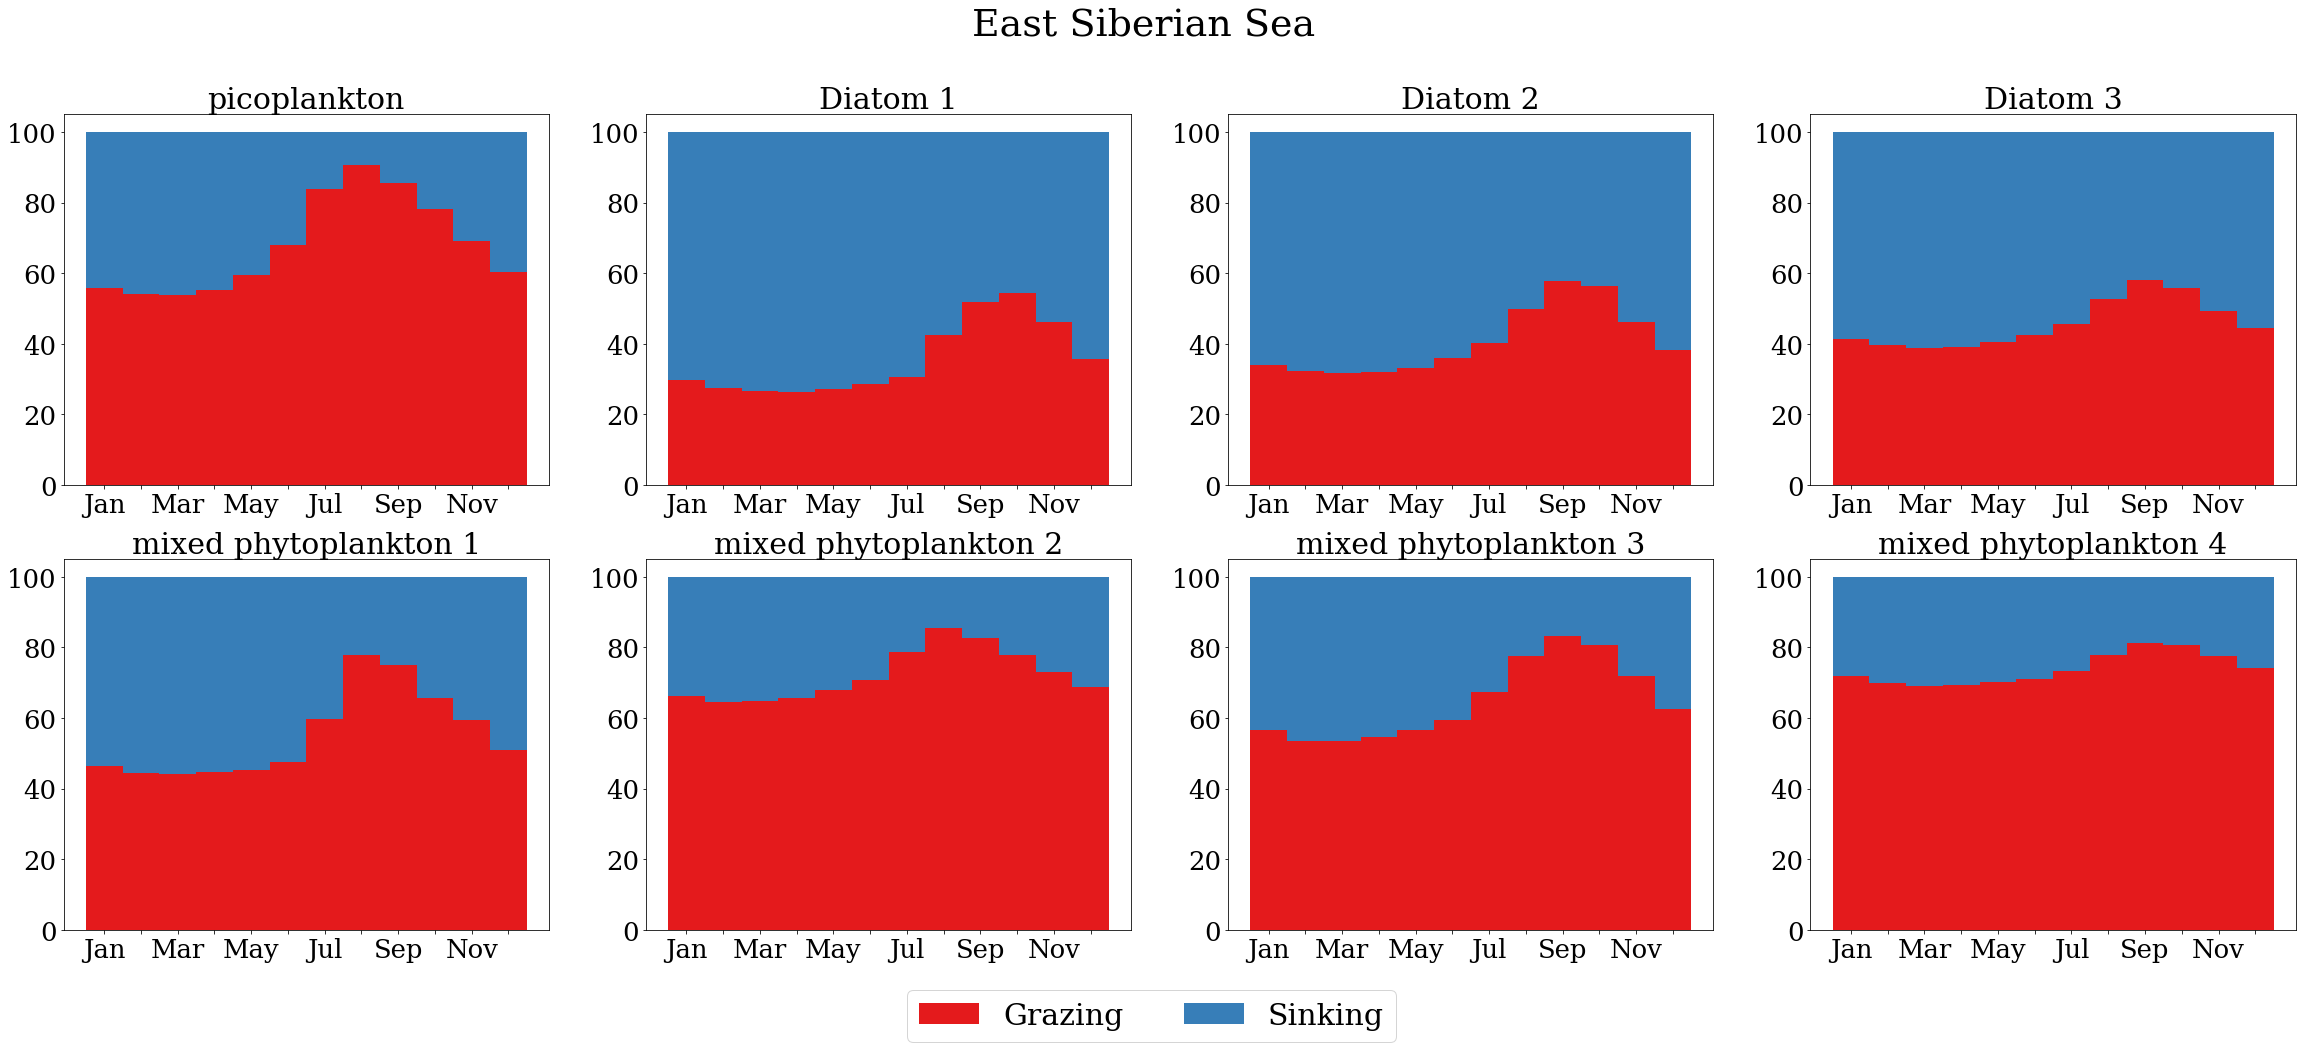

In [19]:
fig = plt.figure(figsize=(40, 15)) 
barWidth=1
x = months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
phyto_names = ['Diatom 1', 'Diatom 2', 'Diatom 3', 'mixed phytoplankton 1', 
           'mixed phytoplankton 2', 'mixed phytoplankton 3', 'mixed phytoplankton 4',
           'picoplankton']
pal = sns.color_palette("Set1")

for i in range(0,8):
    ax = fig.add_subplot(2, 4, i+1)
    ax.bar(x,np.nanmean(plankton_graze_prop[i,:,149:170,325:360], axis=(1,2)),color=pal[0],width=barWidth)
    ax.bar(x,np.nanmean(plankton_loss_prop[i,:,149:170,325:360], axis=(1,2)),bottom=np.nanmean(plankton_graze_prop[i,:,149:170,325:360], axis=(1,2)),color=pal[1],width=barWidth)
    ax.set_title(''+str(phyto_names[i-1]), fontsize=30)
    ax.set_xticklabels(['Jan','','Mar','','May','','Jul','','Sep','','Nov',''])
    
fig.legend(['Grazing', 'Sinking'], loc='lower center',ncol=2,borderaxespad=.5, fontsize=30)
fig.suptitle('East Siberian Sea', fontsize=38)
fig.savefig(''+figures_file+'/'+new_file+'/sinking_vs_grazing_ess_regrid'+year+'_year.png')

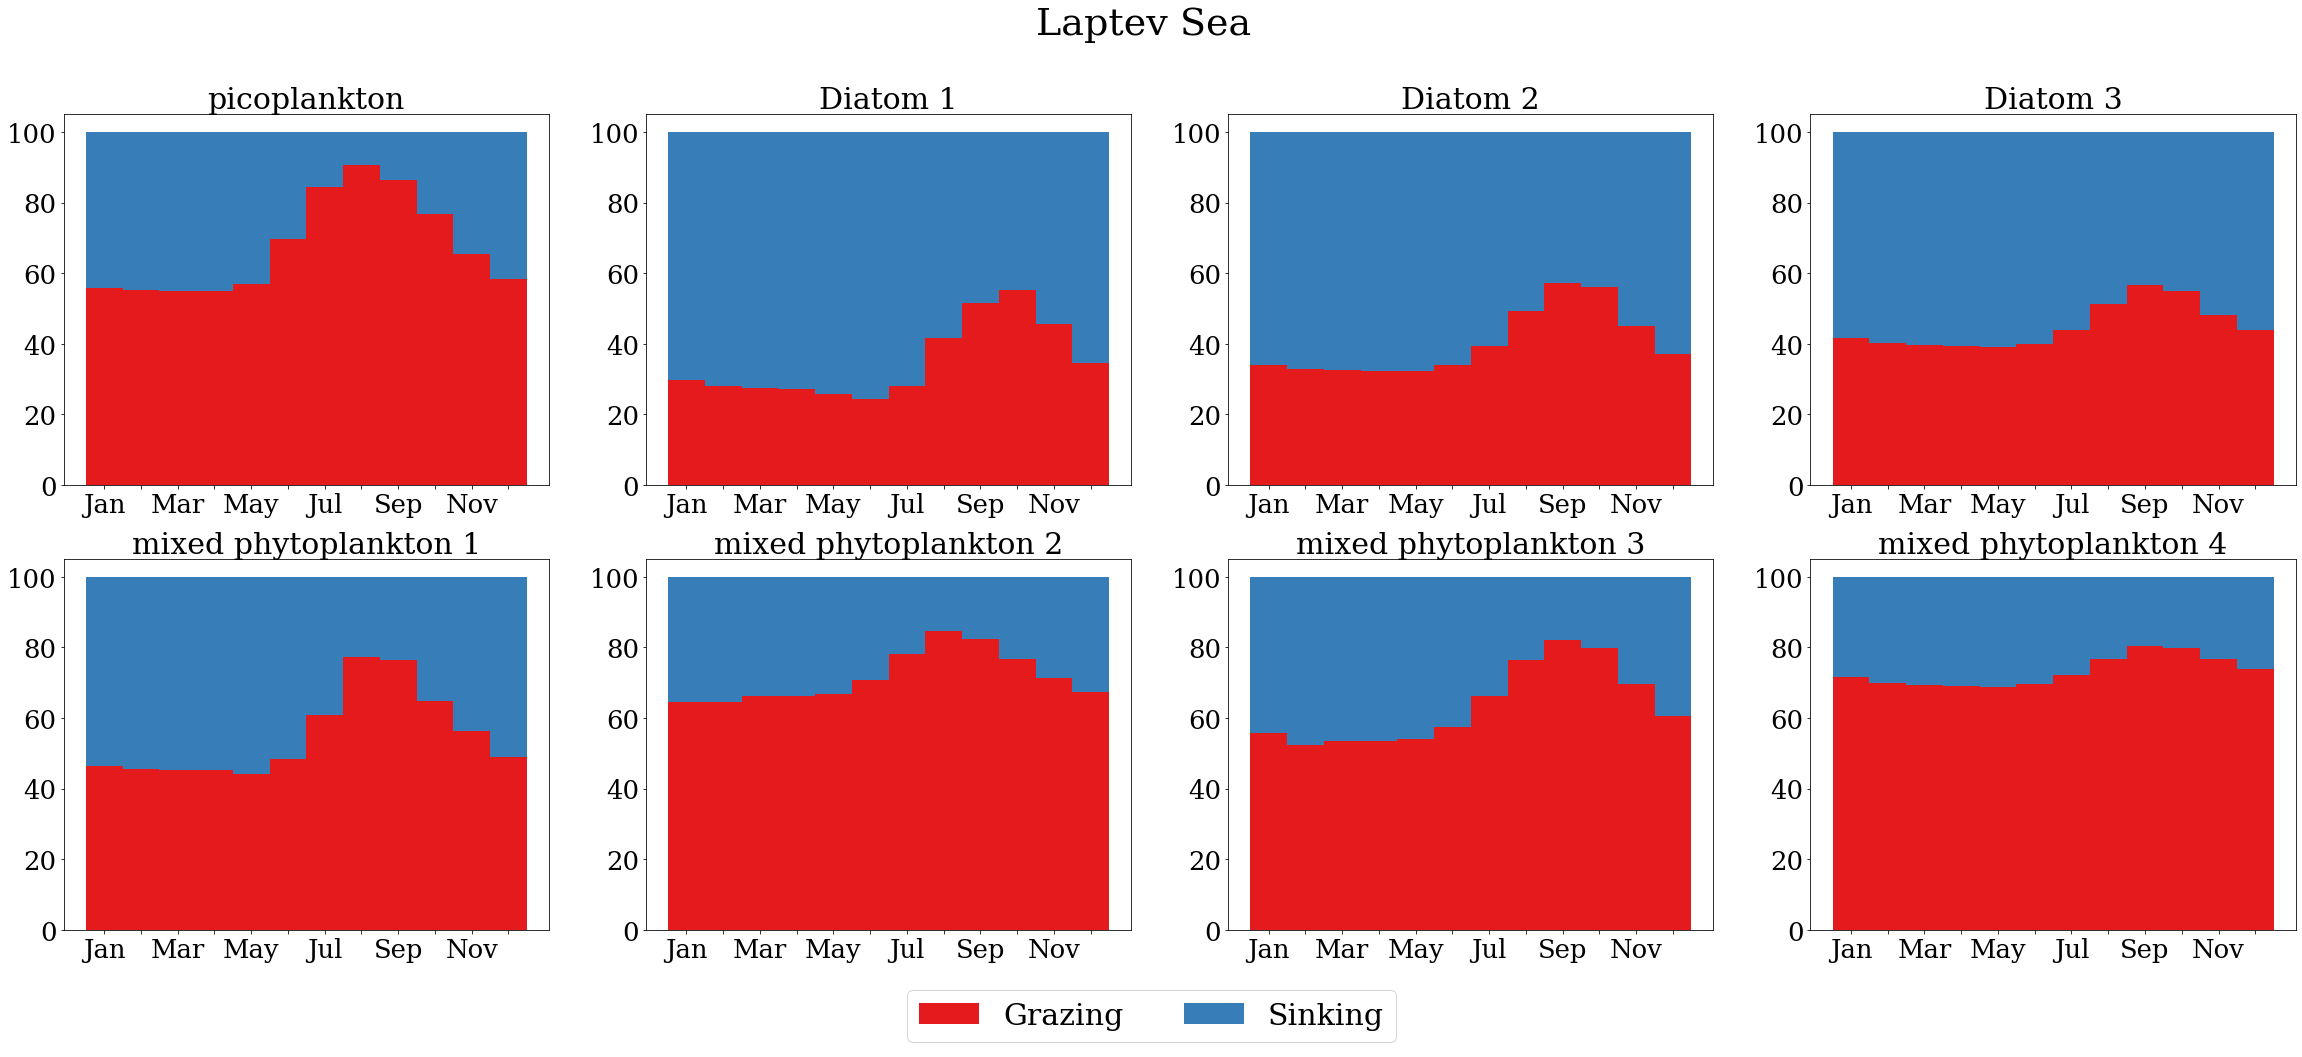

In [20]:
fig = plt.figure(figsize=(40, 15)) 
barWidth=1
x = months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
phyto_names = ['Diatom 1', 'Diatom 2', 'Diatom 3', 'mixed phytoplankton 1', 
           'mixed phytoplankton 2', 'mixed phytoplankton 3', 'mixed phytoplankton 4',
           'picoplankton']
pal = sns.color_palette("Set1")

for i in range(0,8):
    ax = fig.add_subplot(2, 4, i+1)
    ax.bar(x,np.nanmean(plankton_graze_prop[i,:,149:170,270:325], axis=(1,2)),color=pal[0],width=barWidth)
    ax.bar(x,np.nanmean(plankton_loss_prop[i,:,149:170,270:325], axis=(1,2)),bottom=np.nanmean(plankton_graze_prop[i,:,149:170,270:325], axis=(1,2)),color=pal[1],width=barWidth)
    ax.set_title(''+str(phyto_names[i-1]), fontsize=30)
    ax.set_xticklabels(['Jan','','Mar','','May','','Jul','','Sep','','Nov',''])
    
fig.legend(['Grazing', 'Sinking'], loc='lower center',ncol=2,borderaxespad=.5, fontsize=30)
fig.suptitle('Laptev Sea', fontsize=38)
fig.savefig(''+figures_file+'/'+new_file+'/sinking_vs_grazing_ls_regrid'+year+'_year.png')

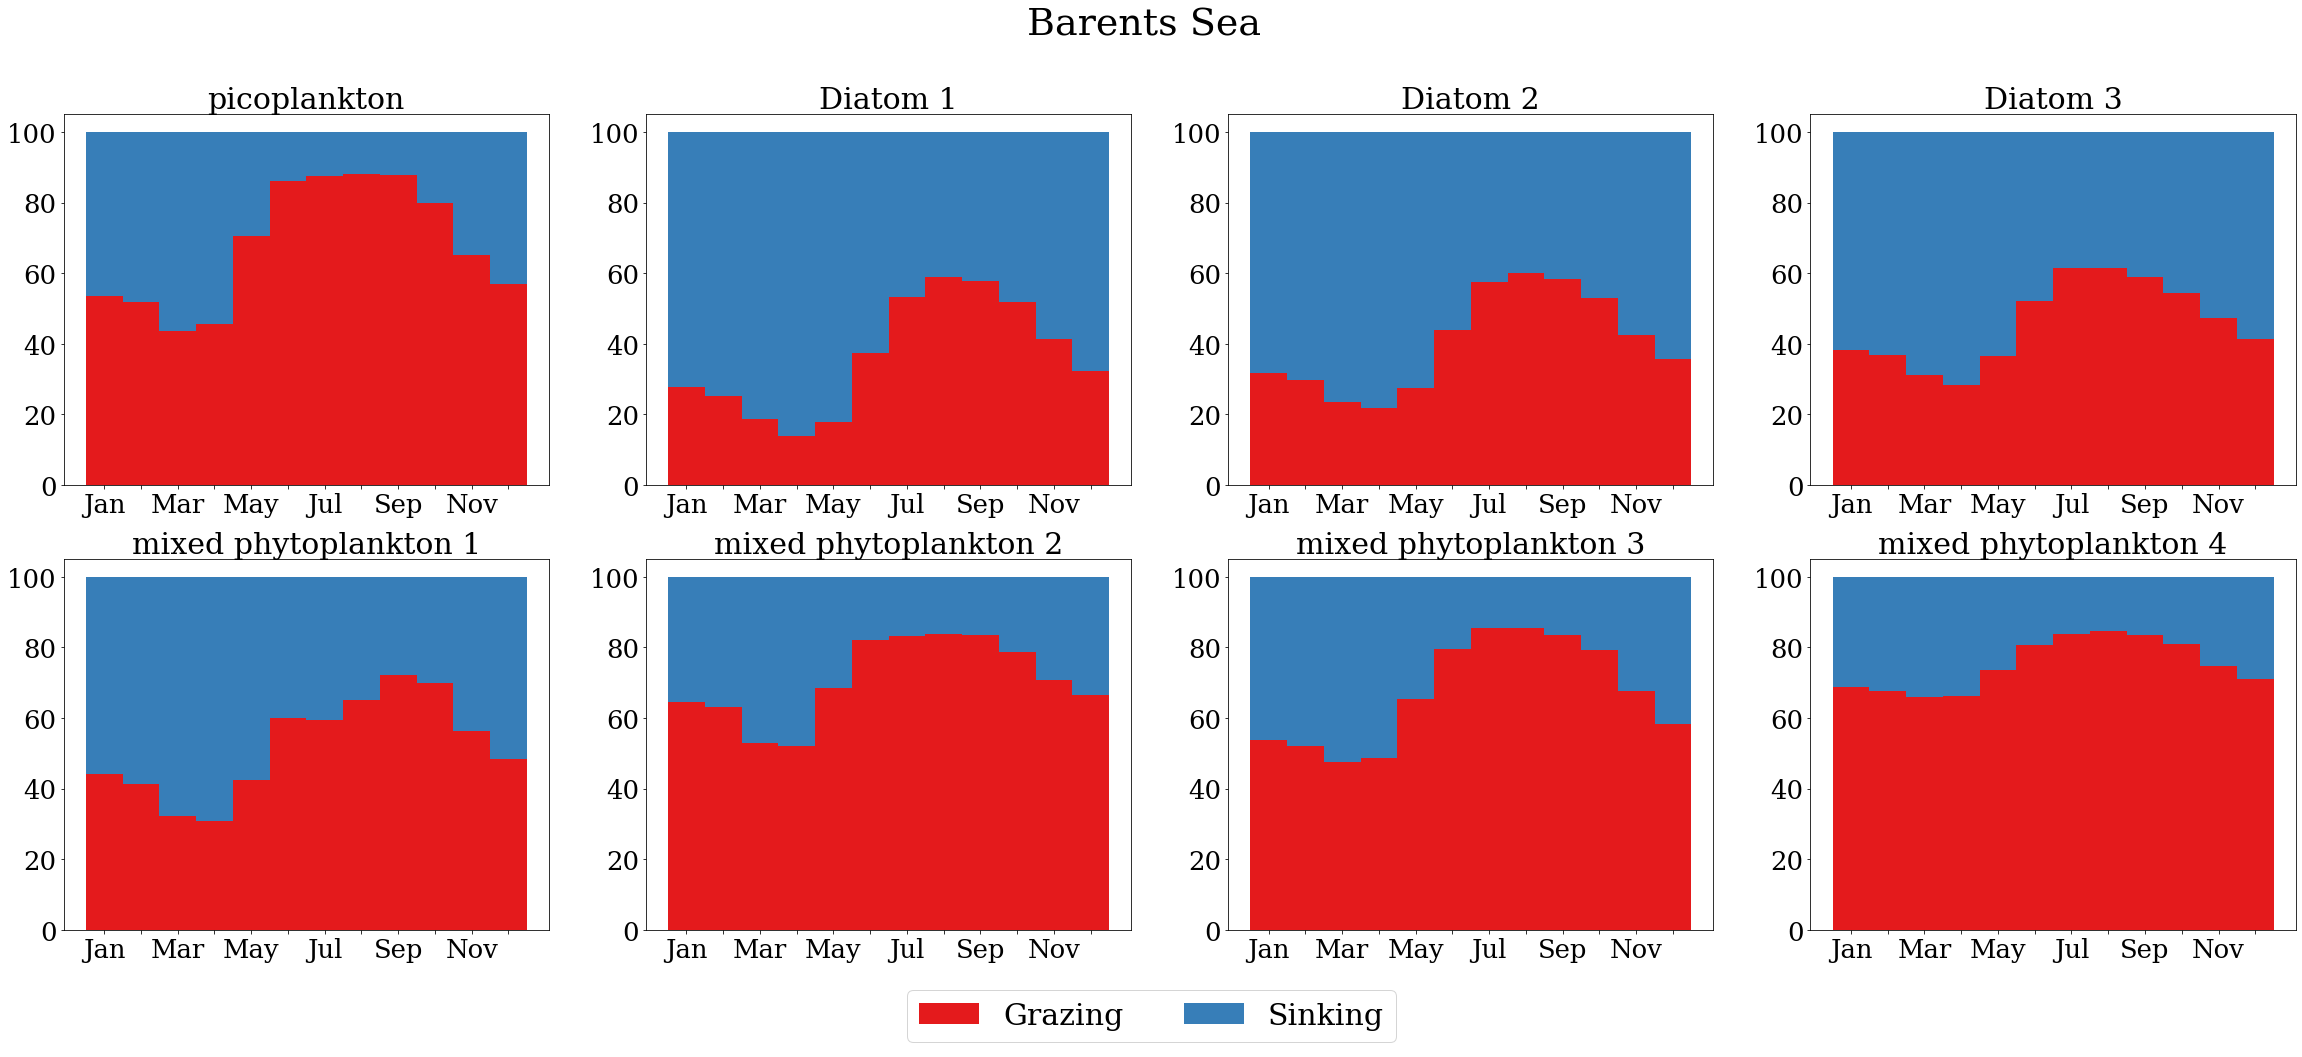

In [21]:
fig = plt.figure(figsize=(40, 15)) 
barWidth=1
x = months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
phyto_names = ['Diatom 1', 'Diatom 2', 'Diatom 3', 'mixed phytoplankton 1', 
           'mixed phytoplankton 2', 'mixed phytoplankton 3', 'mixed phytoplankton 4',
           'picoplankton']
pal = sns.color_palette("Set1")

for i in range(0,8):
    ax = fig.add_subplot(2, 4, i+1)
    ax.bar(x,np.nanmean(plankton_graze_prop[i,:,149:170,205:233], axis=(1,2)),color=pal[0],width=barWidth)
    ax.bar(x,np.nanmean(plankton_loss_prop[i,:,149:170,205:233], axis=(1,2)),bottom=np.nanmean(plankton_graze_prop[i,:,149:170,205:233], axis=(1,2)),color=pal[1],width=barWidth)
    ax.set_title(''+str(phyto_names[i-1]), fontsize=30)
    ax.set_xticklabels(['Jan','','Mar','','May','','Jul','','Sep','','Nov',''])
    
fig.legend(['Grazing', 'Sinking'], loc='lower center',ncol=2,borderaxespad=.5, fontsize=30)
fig.suptitle('Barents Sea', fontsize=38)
fig.savefig(''+figures_file+'/'+new_file+'/sinking_vs_grazing_bts_regrid'+year+'_year.png')

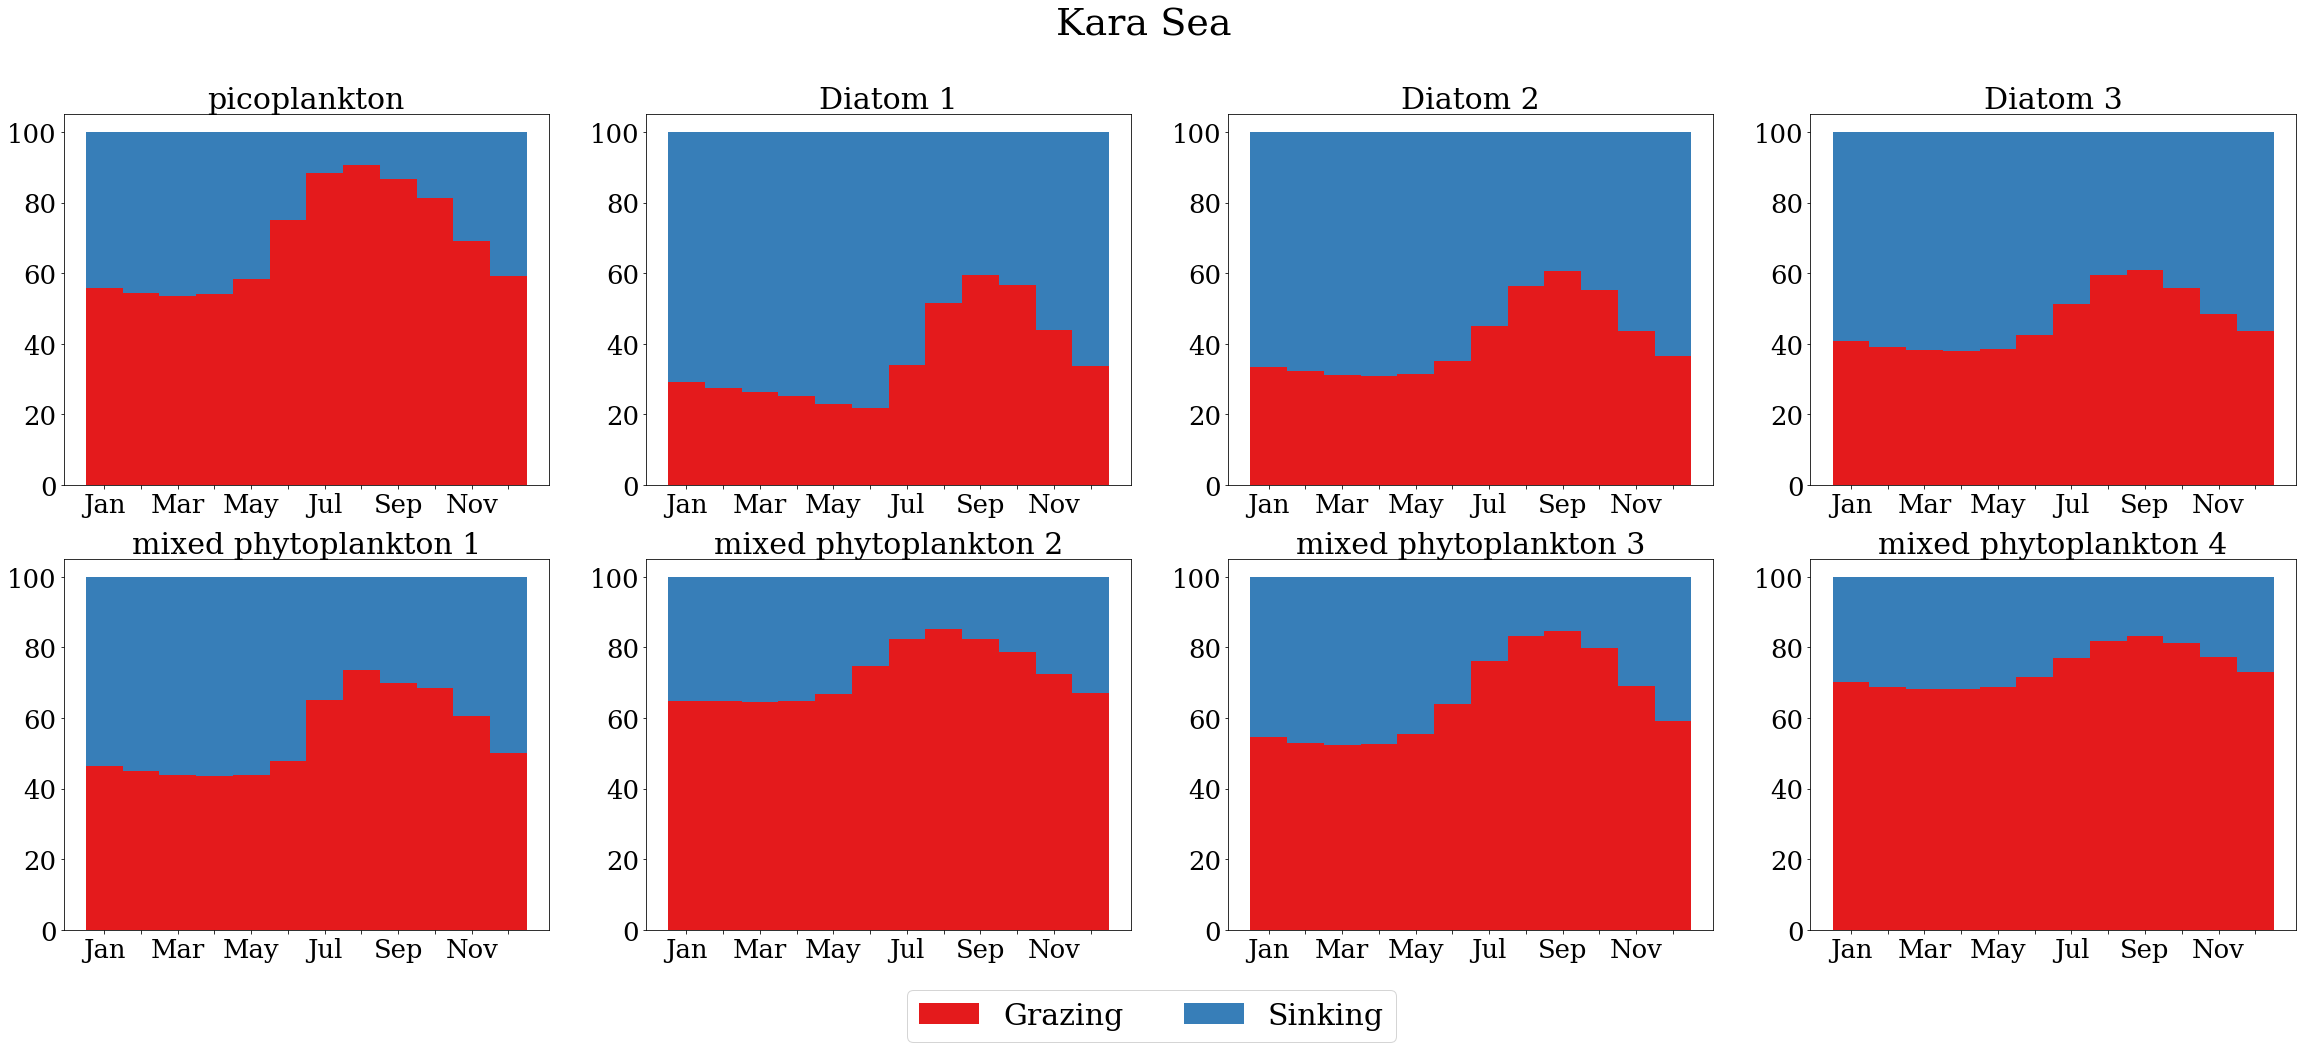

In [22]:
fig = plt.figure(figsize=(40, 15)) 
barWidth=1
x = months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
phyto_names = ['Diatom 1', 'Diatom 2', 'Diatom 3', 'mixed phytoplankton 1', 
           'mixed phytoplankton 2', 'mixed phytoplankton 3', 'mixed phytoplankton 4',
           'picoplankton']
pal = sns.color_palette("Set1")

for i in range(0,8):
    ax = fig.add_subplot(2, 4, i+1)
    ax.bar(x,np.nanmean(plankton_graze_prop[i,:,149:170,233:270], axis=(1,2)),color=pal[0],width=barWidth)
    ax.bar(x,np.nanmean(plankton_loss_prop[i,:,149:170,233:270], axis=(1,2)),bottom=np.nanmean(plankton_graze_prop[i,:,149:170,233:270], axis=(1,2)),color=pal[1],width=barWidth)
    ax.set_title(''+str(phyto_names[i-1]), fontsize=30)
    ax.set_xticklabels(['Jan','','Mar','','May','','Jul','','Sep','','Nov',''])
    
fig.legend(['Grazing', 'Sinking'], loc='lower center',ncol=2,borderaxespad=.5, fontsize=30)
fig.suptitle('Kara Sea', fontsize=38)
fig.savefig(''+figures_file+'/'+new_file+'/sinking_vs_grazing_ks_regrid'+year+'_year.png')